<a href="https://colab.research.google.com/github/007sanjib/My-test/blob/master/Project_9_NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment - Problem Statement


## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 

## Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model
 

## Steps and tasks:

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
5. Vectorization: (8 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)
8.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

 

## Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

## Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
  

Regards

Program Office

Happy Learning!


## Scoring guide (Rubric) - Twitter US Airline Sentiment

### Criteria	Points

Data Summary
Add your view and opinion along with the problem statement, shape of the data, data description.
4

Exploratory data analysis
Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.
9

Understanding of Data Columns
Drop unnecessary columns, chek shape of the data, print 1st few rows of data.
3

Data Pre - Processing
Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing.
12

Vectorization
Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model
8

Modelling , tuning and Evaluation
- Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)
14

Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.
6

Overall Structure and flow ofNotebook
Structure and flow Well commented code
4

Points	60


# Project Solution - The Answer by Sanjib: 

Date : Oct-31-2021

Author : Sanjib K Basu

*Note: Google Colab provides Table of Contents on the left top menu*




# 0. Initial Observations regrading the problem

1. Twitter text data are casually written text, sometimes lack grammer, coherency, recognized words. Words are often substiuted with emoji, lingo and symbols. Model of Sentiment Analysis would encouter noise in the data, careful text data pre processing would be important. In certain scenarios, human expert would have difficult choices to classify sentiment of tweets.

2. Twitter has limit of words, and users also spend less time in writting tweets. Moreover, only Feb-2015 data are provided.  The volume of data may be indequate for model inference. A pre-trained model of twitter data with many millions of tweets should have better performance.

3. The sentiment expressed by users could be fake, motivated, or machine generated, too. The reliablity of the source of data impacts trustworthiness of model outcome.

4. In the limited scope of this project, the objective would be to only classify positive, negative, and neutral tweets, based on tweet texts. Further, other features (columns) could have considered in this classification, as well as classification of negative reasons could have been explored.


 Install libraries :

In [1]:
!python --version

Python 3.7.12


In [2]:
!pip install pandas-profiling==2.8.0 --user pandas-profiling



In [3]:
!pip install emoji
# !pip install emot --upgrade
# !pip install demoji

In [4]:
!pip install bs4

In [5]:

!pip install contractions

In [6]:
!pip install transformers

In [7]:
# Transformers installation
! pip install transformers datasets

In [8]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

import os

import pandas as pd
import numpy as np
import pandas_profiling as pf

import copy

from datetime import datetime

import seaborn as sns # for data visualization 
import tensorflow as tf
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

from bs4 import BeautifulSoup    
import contractions   

import emoji

import re, string, unicodedata 
import pickle

# import emot
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS

from sklearn.utils import class_weight 

from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.text import Tokenizer                        # Text tokenization utility class.
from tensorflow.keras.preprocessing.sequence import pad_sequences                # Pads sequences to the same length.
from tensorflow.keras.models import Sequential                                   # 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional      #Keras layers API.

import tensorflow_datasets as tfds


# Model hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer
)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import nltk
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import pickle
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None) # prints the DataFrame cells with full text, none of its values truncated.
pd.set_option('display.max_columns', 100) # prints upto 100 columns
pd.set_option('display.max_rows', 200) # prints upto 200 rows
pd.set_option('display.colheader_justify', 'left') # dataframe column header left justified

pd.options.display.float_format = (
    "{:,.4f}".format
)  # format upto 4 decimals of float numbers

sns.set(color_codes=True)  # keeps the colored grid in the plot background
sns.set_context("talk")  # talk : bolds the plots
plt.style.use("seaborn-notebook")  # set a default style while plotting

In [9]:
print(tf.__version__)

2.7.0


# 1. Overview of the Dataset

 Load the data and perform preliminary analysis

In [10]:
# mount the G drive
from google.colab import drive
drive.mount('/content/drive' ,force_remount=False) #force_remount=True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!ls /content/drive/MyDrive/Colab\ Notebooks


'Copy of Project_9_NLP_Twitter_Sentiment_Analysis.ipynb'   tweet-clean_bak1.csv
 images.npy						   tweet-clean.csv
 Labels.csv						   Tweets.csv
 Project_8_Plant_Seedling_Classification.ipynb		   UT-Austin
 Project_9_NLP_Twitter_Sentiment_Analysis.ipynb


In [12]:
df_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tweets.csv")

df_tweets

tweet_id           airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513   neutral         1.0000                          
1      570301130888122368  positive         0.3486                          
2      570301083672813571   neutral         0.6837                          
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
...                   ...               ...                           ...   
14635  569587686496825344  positive         0.3487                          
14636  569587371693355008  negative         1.0000                          
14637  569587242672398336   neutral         1.0000                          
14638  569587188687634433  negative         1.0000                          
14639  569587140490866689   neutral         0.6771                          

      negativereason           negativereason_confidence airline          \
0                         NaN    nan                      Virgin America   
1                         NaN 0.0000                      Virgin America   
2                         NaN    nan                      Virgin America   
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
...                       ...                        ...             ...   
14635                     NaN 0.0000                            American   
14636  Customer Service Issue 1.0000                            American   
14637                     NaN    nan                            American   
14638  Customer Service Issue 0.6659                            American   
14639                     NaN 0.0000                            American   

      airline_sentiment_gold name             negativereason_gold  \
0      NaN                            cairdin  NaN                  
1      NaN                           jnardino  NaN                  
2      NaN                         yvonnalynn  NaN                  
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
...                      ...              ...                 ...   
14635  NaN                    KristenReenders  NaN                  
14636  NaN                           itsropes  NaN                  
14637  NaN                           sanyabun  NaN                  
14638  NaN                         SraJackson  NaN                  
14639  NaN                          daviddtwu  NaN                  

       retweet_count  \
0      0               
1      0               
2      0               
3      0               
4      0               
...              ...   
14635  0               
14636  0               
14637  0               
14638  0               
14639  0               

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                  

In [13]:
df_tweets.shape

(14640, 15)

In [14]:
df_tweets.info() # checking null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

 Check below nulls and duplicates

In [15]:
df_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [16]:
df_tweets.duplicated().sum()

36

In [17]:
df_tweets.duplicated(subset=['text']).sum()

213

In [18]:
df_tweets.describe(include="all").T


count       unique top                          \
tweet_id                     14,640.0000    NaN                         NaN   
airline_sentiment                  14640      3                    negative   
airline_sentiment_confidence 14,640.0000    NaN                         NaN   
negativereason                      9178     10      Customer Service Issue   
negativereason_confidence    10,522.0000    NaN                         NaN   
airline                            14640      6                      United   
airline_sentiment_gold                40      3                    negative   
name                               14640   7701                 JetBlueNews   
negativereason_gold                   32     13      Customer Service Issue   
retweet_count                14,640.0000    NaN                         NaN   
text                               14640  14427              @united thanks   
tweet_coord                         1019    832                  [0.0, 0.0]   
tweet_created                      14640  14247   2015-02-24 09:54:34 -0800   
tweet_location                      9907   3081                  Boston, MA   
user_timezone                       9820     85  Eastern Time (US & Canada)   

                             freq  mean                          \
tweet_id                       NaN 569,218,351,767,382,528.0000   
airline_sentiment             9178                          NaN   
airline_sentiment_confidence   NaN                       0.9002   
negativereason                2910                          NaN   
negativereason_confidence      NaN                       0.6383   
airline                       3822                          NaN   
airline_sentiment_gold          32                          NaN   
name                            63                          NaN   
negativereason_gold             12                          NaN   
retweet_count                  NaN                       0.0827   
text                             6                          NaN   
tweet_coord                    164                          NaN   
tweet_created                    5                          NaN   
tweet_location                 157                          NaN   
user_timezone                 3744                          NaN   

                             std                       \
tweet_id                     779,111,158,481,836.7500   
airline_sentiment                                 NaN   
airline_sentiment_confidence                   0.1628   
negativereason                                    NaN   
negativereason_confidence                      0.3304   
airline                                           NaN   
airline_sentiment_gold                            NaN   
name                                              NaN   
negativereason_gold                               NaN   
retweet_count                                  0.7458   
text                                              NaN   
tweet_coord                                       NaN   
tweet_created                                     NaN   
tweet_location                                    NaN   
user_timezone                                     NaN   

                             min                           \
tweet_id                     567,588,278,875,213,824.0000   
airline_sentiment                                     NaN   
airline_sentiment_confidence                       0.3350   
negativereason                                        NaN   
negativereason_confidence                          0.0000   
airline                                               NaN   
airline_sentiment_gold                                NaN   
name                                                  NaN   
negativereason_gold                                   NaN   
retweet_count                                      0.0000   
text                                                  NaN   
tweet_coord                                   

### Observation by Sanjib:

1. The data is spread over 85 time zones and 3081 locations. Next, we can check the distribution of tweet_created. Thereafter, the sample dataset may be assumed to be good representation of the population of data.

2. Tweet co ordinates could have been used to plot in geographic map, when time permits to expand the scope of the project.

3. The values shown by describe() function looks feasible, no need of data correction.

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


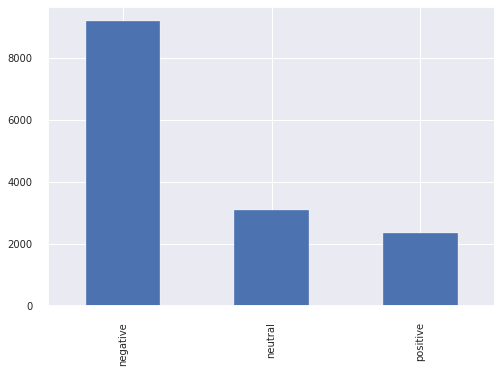

In [19]:
print(df_tweets["airline_sentiment"].value_counts())

df_tweets["airline_sentiment"].value_counts().plot(kind="bar")

### Observation by Sanjib:

1. The "airline_sentiment" is likely to be the target variable, we'll confirm with futher EDA. The variable "airline_sentiment" does not have any missing value.

In [20]:
df_tweets["airline_sentiment"].value_counts(normalize=True)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64

# 2. Exploratory Data Analysis:

In [21]:
%%time
df_tweets.profile_report(title="Pandas Profiling of Tweet Data")


CPU times: user 28 ms, sys: 1.95 ms, total: 30 ms
Wall time: 29.3 ms


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
print("Mininum tweet_created =",min(pd.to_datetime(df_tweets["tweet_created"])),
      "Maximum tweet_created =", max(pd.to_datetime(df_tweets["tweet_created"])))

Mininum tweet_created = 2015-02-16 23:36:05-08:00 Maximum tweet_created = 2015-02-24 11:53:37-08:00


In [23]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "name",
                     "negativereason",
                     "tweet_location", 
                      ]

for col in column_categories:
    print("="*40, col)
    print(df_tweets[col].value_counts() )



======================================== airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
======================================== retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64
======================================== user_timezone
Eastern Time (US & Canada)     3744
Central Time (US & Canada)     1931
Pacific Time (US & Canada)     1208
Quito                           738
Atlantic Time (Canada)          497
Mountain Time (US & Canada)     369
Arizona                         229
London                          195
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                    

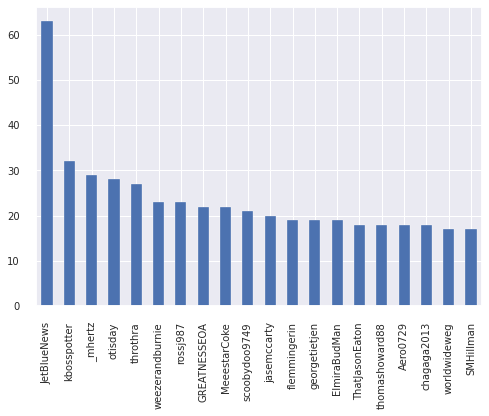

In [24]:
# top 20 users by number of tweets
df_tweets["name"].value_counts().head(20).plot(kind="bar");

### Observation by Sanjib:
1. The JetBlueNews mention (name) looks like sponsored by company, and would never tweet negative sentiment.


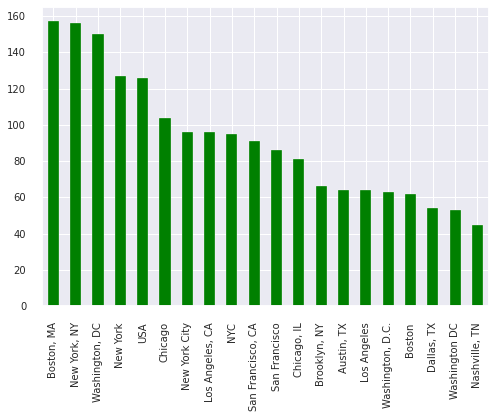

In [25]:
# top 20 locations by number of tweets
df_tweets["tweet_location"].value_counts().head(20).plot(kind="bar",
                                                         color="Green");

In [26]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline                      American  Delta  Southwest  US Airways  United  \
negativereason                                                                
Bad Flight                    87        64     90        104         216      
Can't Tell                   198       186    159        246         379      
Cancelled Flight             246        51    162        189         181      
Customer Service Issue       768       199    391        811         681      
Damaged Luggage               12        11     14         11          22      
Flight Attendant Complaints   87        60     38        123         168      
Flight Booking Problems      130        44     61        122         144      
Late Flight                  249       269    152        453         525      
Lost Luggage                 149        57     90        154         269      
longlines                     34        14     29         50          48      

airline                      Virgin America  
negativereason                               
Bad Flight                   19              
Can't Tell                   22              
Cancelled Flight             18              
Customer Service Issue       60              
Damaged Luggage               4              
Flight Attendant Complaints   5              
Flight Booking Problems      28              
Late Flight                  17              
Lost Luggage                  5              
longlines                     3

In [27]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="retweet_count",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

retweet_count                0          1        2       3      4      5      \
negativereason                                                                 
Bad Flight                    541.0000  35.0000  2.0000 2.0000    nan    nan   
Can't Tell                  1,099.0000  74.0000  4.0000 5.0000 3.0000    nan   
Cancelled Flight              803.0000  33.0000  7.0000 1.0000 2.0000 1.0000   
Customer Service Issue      2,721.0000 166.0000 17.0000 3.0000 3.0000    nan   
Damaged Luggage                72.0000   1.0000     nan    nan 1.0000    nan   
Flight Attendant Complaints   442.0000  35.0000  3.0000 1.0000    nan    nan   
Flight Booking Problems       503.0000  20.0000  3.0000    nan 1.0000 1.0000   
Late Flight                 1,558.0000 102.0000  3.0000    nan 1.0000    nan   
Lost Luggage                  673.0000  49.0000  2.0000    nan    nan    nan   
longlines                     169.0000   9.0000     nan    nan    nan    nan   

retweet_count                7      18     22     31     32     44     
negativereason                                                         
Bad Flight                     nan    nan    nan    nan    nan    nan  
Can't Tell                  1.0000 1.0000 1.0000 1.0000 1.0000    nan  
Cancelled Flight               nan    nan    nan    nan    nan    nan  
Customer Service Issue         nan    nan    nan    nan    nan    nan  
Damaged Luggage                nan    nan    nan    nan    nan    nan  
Flight Attendant Complaints    nan    nan    nan    nan    nan    nan  
Flight Booking Problems     1.0000    nan    nan    nan    nan    nan  
Late Flight                    nan    nan    nan    nan    nan 1.0000  
Lost Luggage                   nan    nan    nan    nan    nan    nan  
longlines                      nan    nan    nan    nan    nan    nan

In [28]:
# df_pivot*100.0/df_tweets.shape[0]

df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline_sentiment",
    index="airline",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline_sentiment  negative  neutral  positive
airline                                       
American           1960      463      336     
Delta               955      723      544     
Southwest          1186      664      570     
US Airways         2263      381      269     
United             2633      697      492     
Virgin America      181      171      152

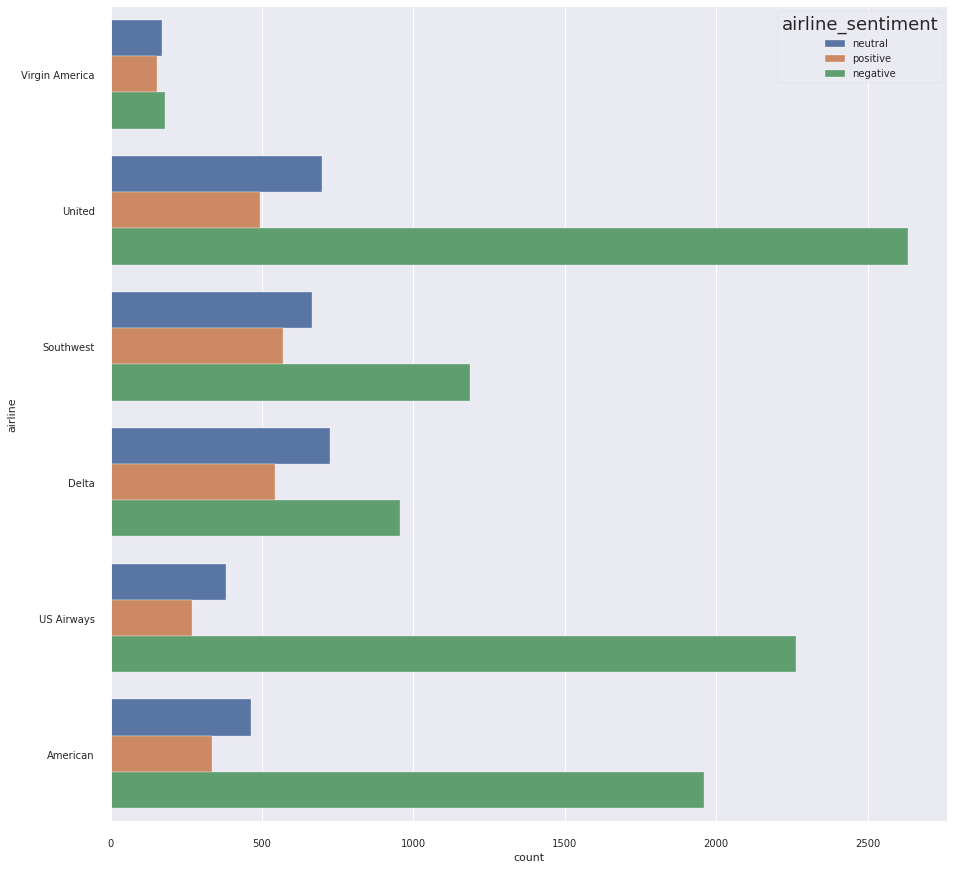

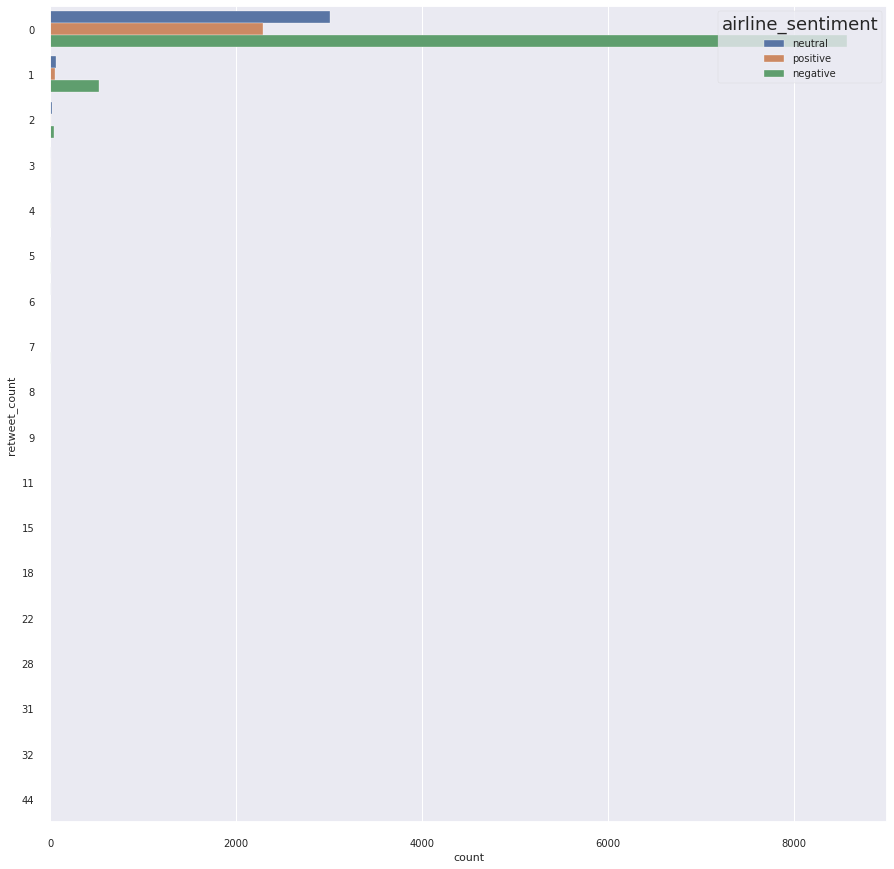

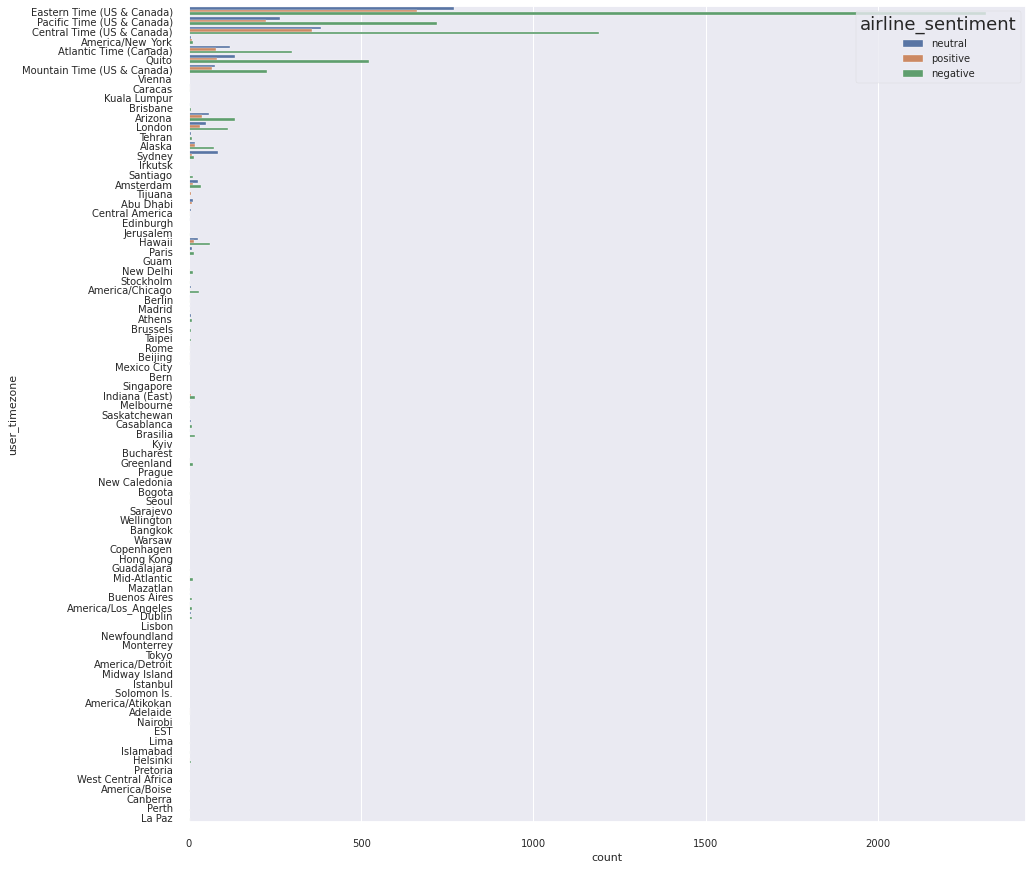

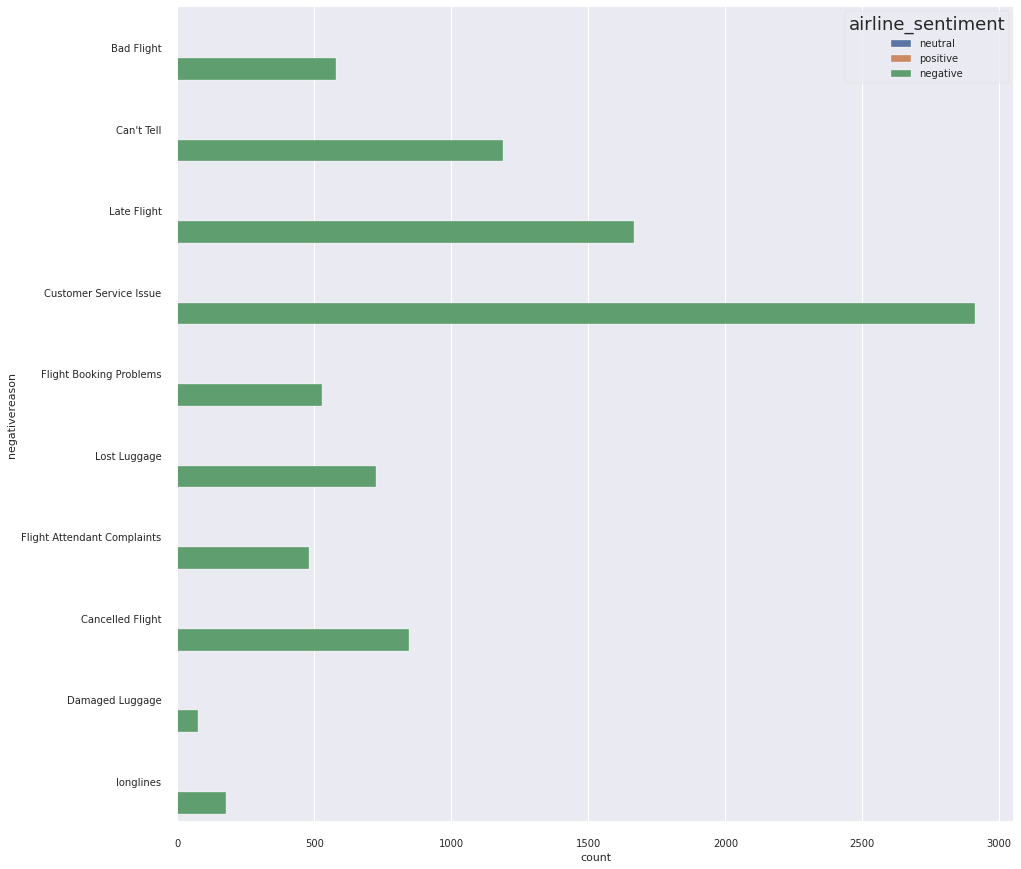

CPU times: user 2.81 s, sys: 121 ms, total: 2.93 s
Wall time: 2.89 s


In [29]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "negativereason"
                    #  "name",
                    #  "tweet_location", 
                      ]

for col in column_categories:
  plt.figure(figsize=(15,15))
  sns.countplot(data=df_tweets,
              # y="tweet_id",
              y=col,
              hue="airline_sentiment"
              )
  plt.show()

In [30]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline_sentiment",
    index="retweet_count",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline_sentiment  negative   neutral    positive 
retweet_count                                     
0                 8,581.0000 3,005.0000 2,287.0000
1                   524.0000    63.0000    53.0000
2                    41.0000    16.0000     9.0000
3                    12.0000     7.0000     3.0000
4                    11.0000     2.0000     4.0000
5                     2.0000     2.0000     1.0000
6                        nan     2.0000     1.0000
7                     2.0000        nan     1.0000
8                        nan        nan     1.0000
9                        nan        nan     1.0000
11                       nan        nan     1.0000
15                       nan     1.0000        nan
18                    1.0000        nan        nan
22                    1.0000        nan     1.0000
28                       nan     1.0000        nan
31                    1.0000        nan        nan
32                    1.0000        nan        nan
44                    1.0000        nan        nan

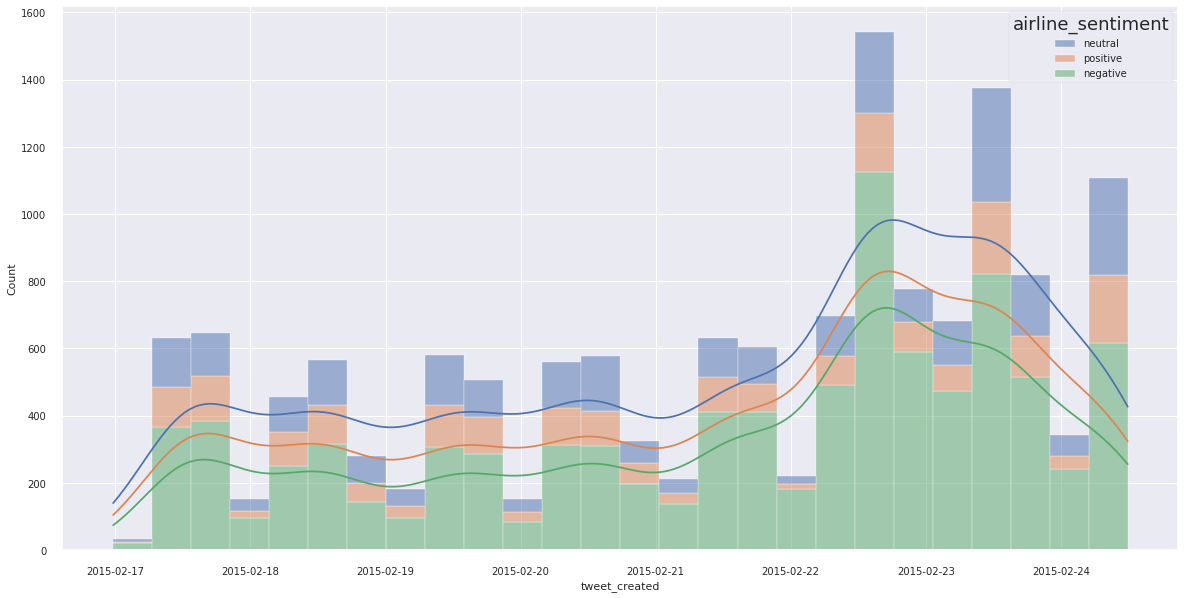

In [31]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline_sentiment",
            multiple="stack",
            kde=True
            )

plt.show()

In [32]:
datetime(2015,2,23).strftime("%A")
# pd.Timestamp("2015-02-23").weekday_name

'Monday'

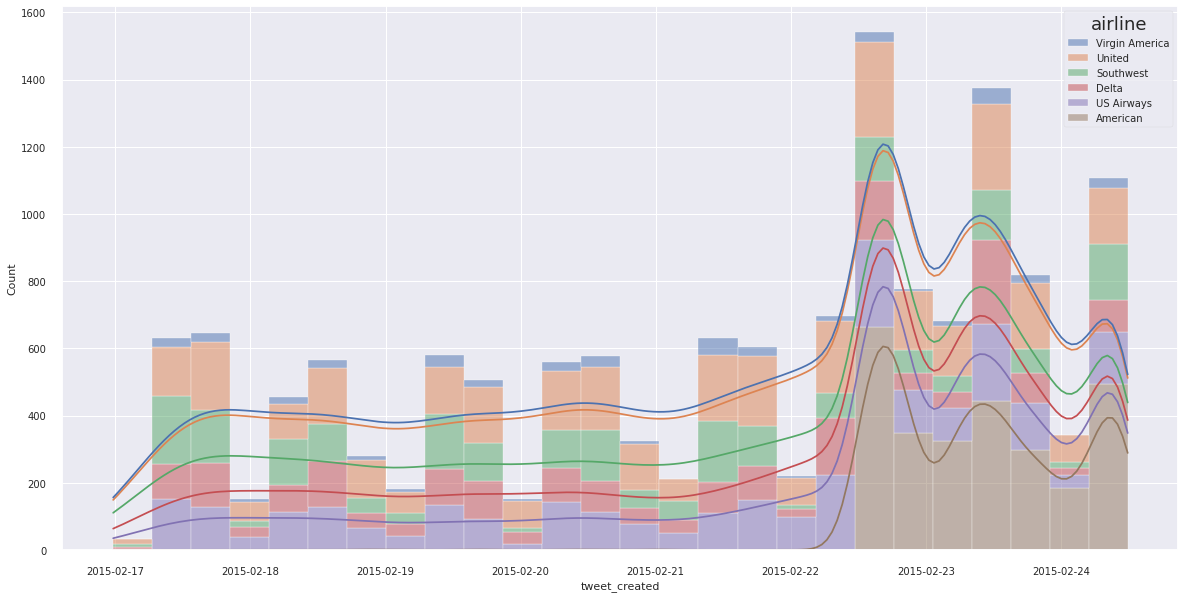

In [33]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline",
            multiple="stack",
            kde=True
            )

plt.show()

In [34]:
df_tweets["text"].sample(10)

2143                                                                                               @united we will be at the airport first thing in the morning
1843                                                                           @united doesn't purchasing ticket with a united card give me priority boarding ?
8764     @JetBlue flight was Cancelled Flighted. Do I need to file a claim for the $50 credit I'm entitled to per yr bill of rights, or will it just be issued?
13876                               @AmericanAir your gate agents at DFW gate B16 are pathetic tonight.  Terrible communication, stories changing and apathetic
7744                       @JetBlue The Opal Dragon book The Dragon (ALI) has woven his murdering ways from the Philippines to Australia http://t.co/ltwhmOL1Dr
10967                                       @USAirways @AmericanAir I am so going to miss US Airways.  You always provided great service and NEVER LET ME DOWN.
6247                                    

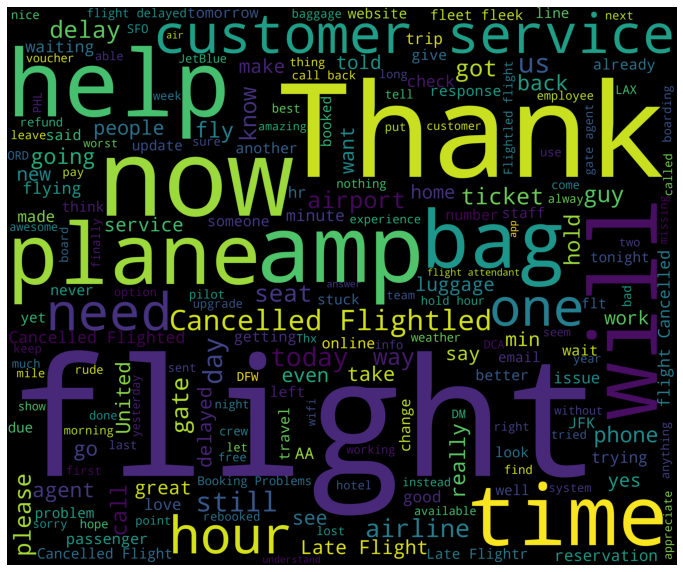

CPU times: user 23.7 s, sys: 379 ms, total: 24 s
Wall time: 23.9 s


In [35]:
%%time
# word cloud summary of all tweets
words = ' '.join(df_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()                     

In [36]:
df_tweets.loc[df_tweets['airline_sentiment']=='negative']

tweet_id           airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
5      570300767074181121  negative         1.0000                          
15     570282469121007616  negative         0.6842                          
17     570276917301137409  negative         1.0000                          
...                   ...               ...                           ...   
14631  569588464896876545  negative         1.0000                          
14633  569587705937600512  negative         1.0000                          
14634  569587691626622976  negative         0.6684                          
14636  569587371693355008  negative         1.0000                          
14638  569587188687634433  negative         1.0000                          

      negativereason           negativereason_confidence airline          \
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
5                  Can't Tell 0.6842                      Virgin America   
15                Late Flight 0.3684                      Virgin America   
17                 Bad Flight 1.0000                      Virgin America   
...                       ...                        ...             ...   
14631              Bad Flight 1.0000                            American   
14633        Cancelled Flight 1.0000                            American   
14634             Late Flight 0.6684                            American   
14636  Customer Service Issue 1.0000                            American   
14638  Customer Service Issue 0.6659                            American   

      airline_sentiment_gold name             negativereason_gold  \
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
5      NaN                           jnardino  NaN                  
15     NaN                    smartwatermelon  NaN                  
17     NaN                      heatherovieda  NaN                  
...                      ...              ...                 ...   
14631  NaN                           MDDavis7  NaN                  
14633  NaN                    RussellsWriting  NaN                  
14634  NaN                      GolfWithWoody  NaN                  
14636  NaN                           itsropes  NaN                  
14638  NaN                         SraJackson  NaN                  

       retweet_count  \
3      0               
4      0               
5      0               
15     0               
17     0               
...              ...   
14631  0               
14633  0               
14634  0               
14636  0               
14638  0               

      text                                                                                                                                                     \
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
5                    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
15                                                                                                              @VirginAmerica SFO-PDX schedule is still MIA.   
17                  @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   
...                                                                                  

********************************************************************************
****************************** negative


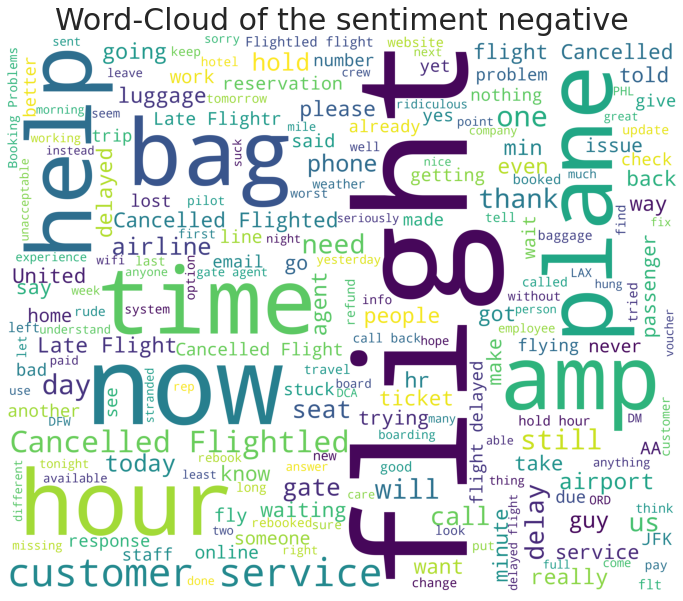

********************************************************************************
****************************** neutral


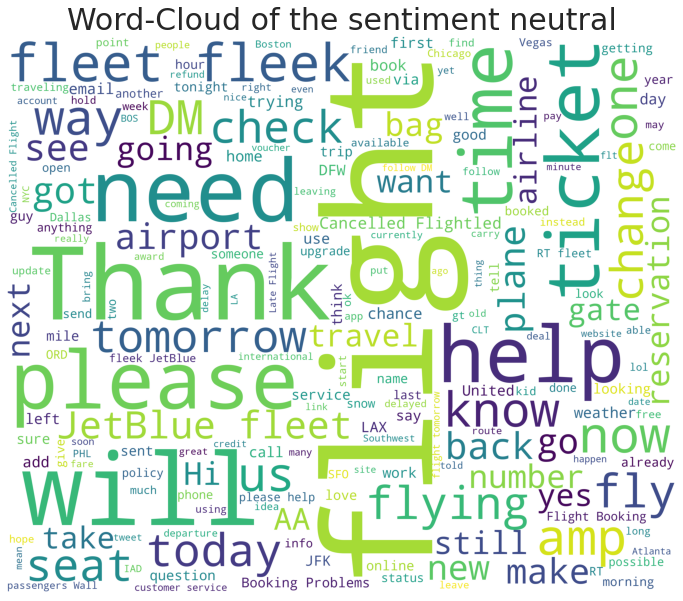

********************************************************************************
****************************** positive


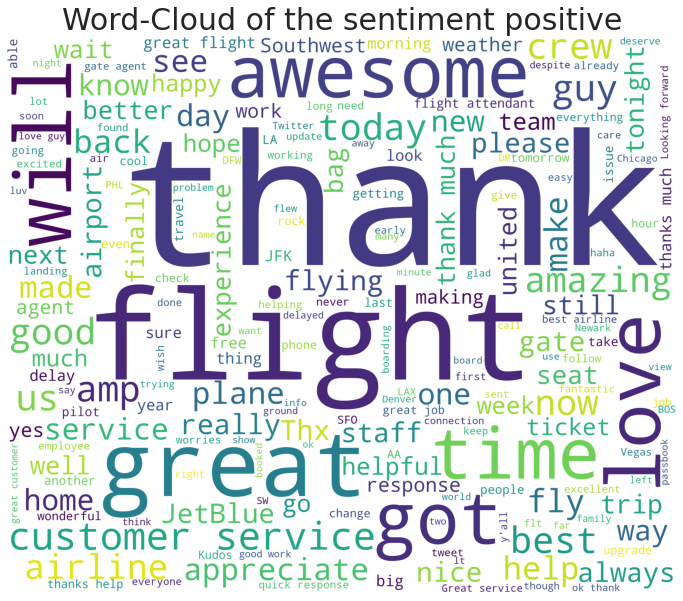

CPU times: user 1min 7s, sys: 1.05 s, total: 1min 8s
Wall time: 1min 8s


In [37]:
%%time

# word cloud summary by all sentiments

for col_value in list(df_tweets["airline_sentiment"].value_counts().index):
  print("*"*80)
  print("*"*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline_sentiment']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.axis('off')
  plt.show()   

============================== United


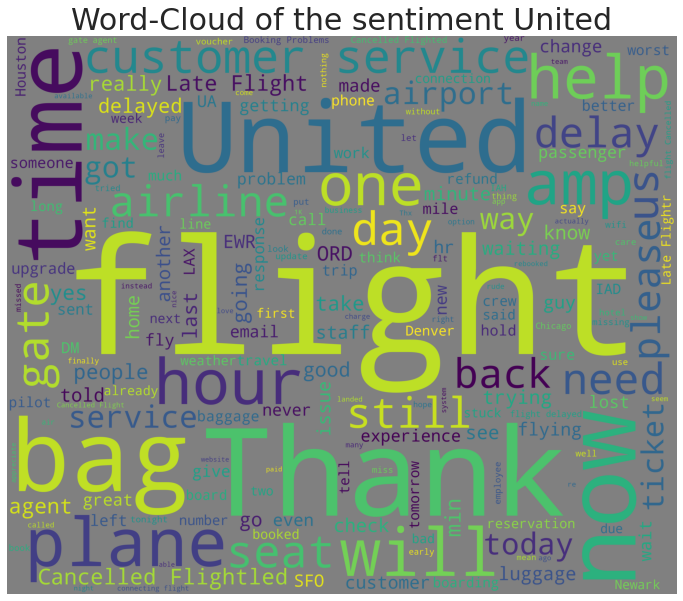

============================== US Airways


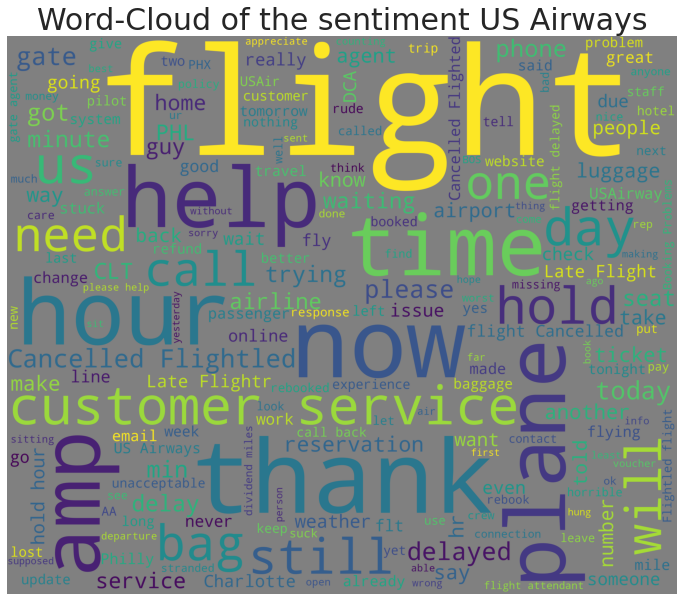

============================== American


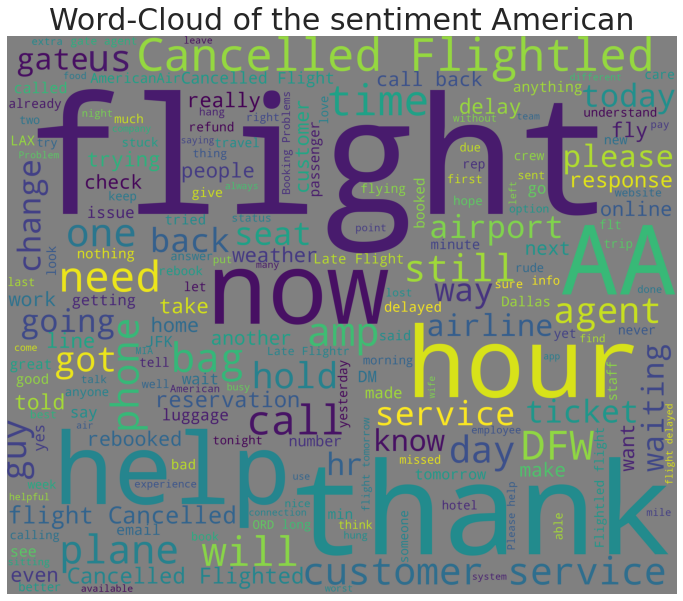

============================== Southwest


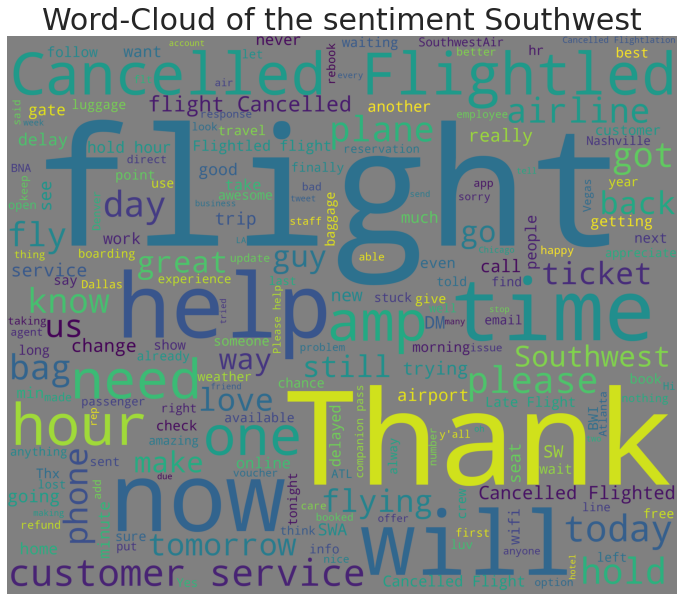

============================== Delta


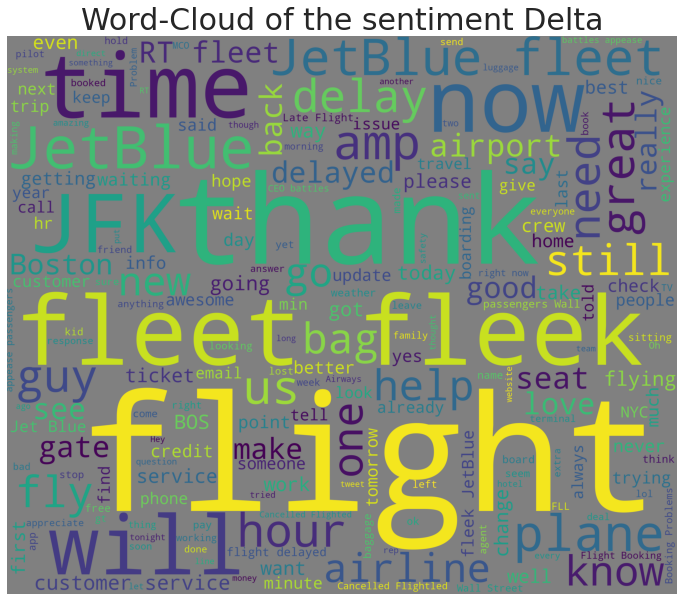

============================== Virgin America


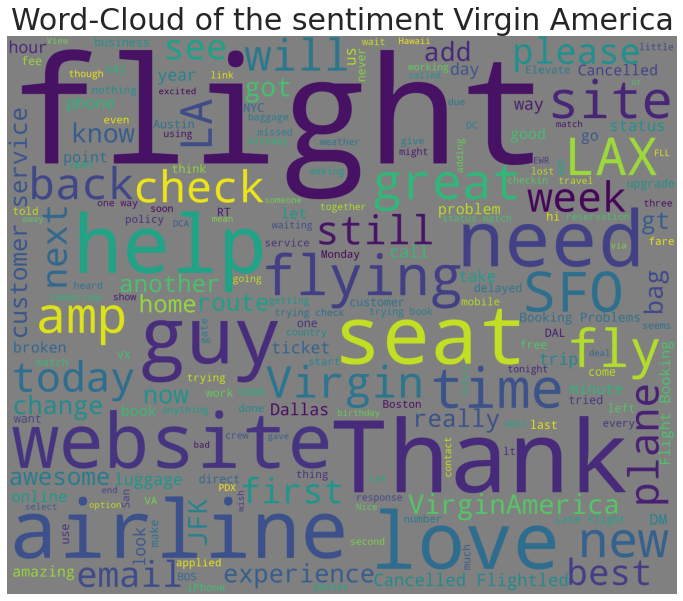

CPU times: user 2min 19s, sys: 2.65 s, total: 2min 22s
Wall time: 2min 22s


In [38]:
%%time

# word cloud summary by airlines

for col_value in list(df_tweets["airline"].value_counts().index):
  print("="*80)
  print("="*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='grey',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show() 

In [39]:
Categories_hour = df_tweets["tweet_created"].apply(lambda x : pd.Timestamp(x).hour)
Categories_hour

0        11
1        11
2        11
3        11
4        11
         ..
14635    12
14636    11
14637    11
14638    11
14639    11
Name: tweet_created, Length: 14640, dtype: int64

In [40]:
Categories_hour = Categories_hour.value_counts().sort_index(ascending=False)
Categories_hour

23     193
22     292
21     430
20     602
19     675
18     751
17     754
16     734
15     788
14     927
13     900
12     824
11     986
10     962
9     1013
8      926
7      776
6      621
5      477
4      368
3      225
2      174
1      111
0      131
Name: tweet_created, dtype: int64

Text(0.5, 1.0, 'Proportion of tweets for each hour of the day')

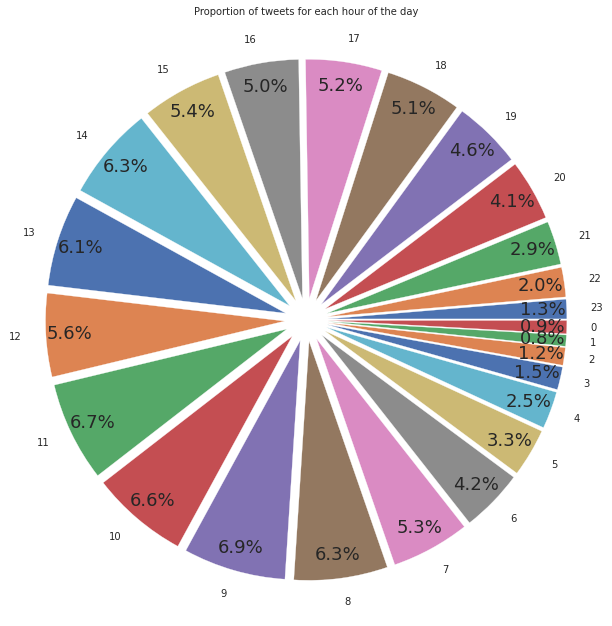

In [41]:
pie, ax = plt.subplots(figsize=[20,11])
# labels = Category.keys()
plt.pie(x=Categories_hour, 
        autopct="%.1f%%", 
        explode=[0.09]*24, 
        labels=Categories_hour.keys(), 
        pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=10)

In [42]:
df_tweets["word_count"] = [len(t.split()) for t in df_tweets["text"]]
df_tweets["word_count"].describe().T

count   14,640.0000
mean        17.6534
std          6.8823
min          2.0000
25%         12.0000
50%         19.0000
75%         23.0000
max         36.0000
Name: word_count, dtype: float64

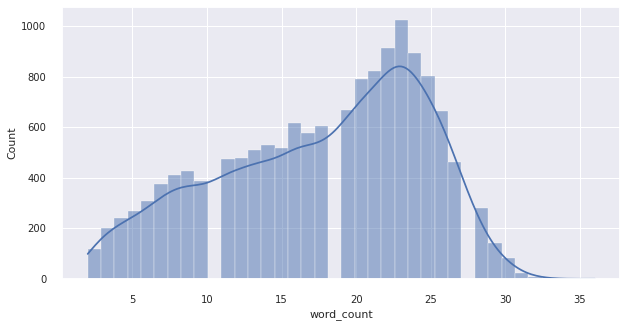

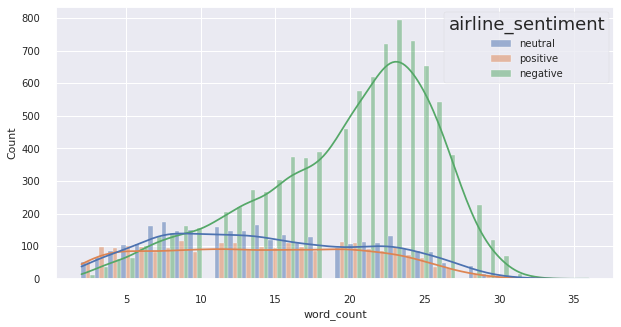

<Figure size 720x360 with 0 Axes>

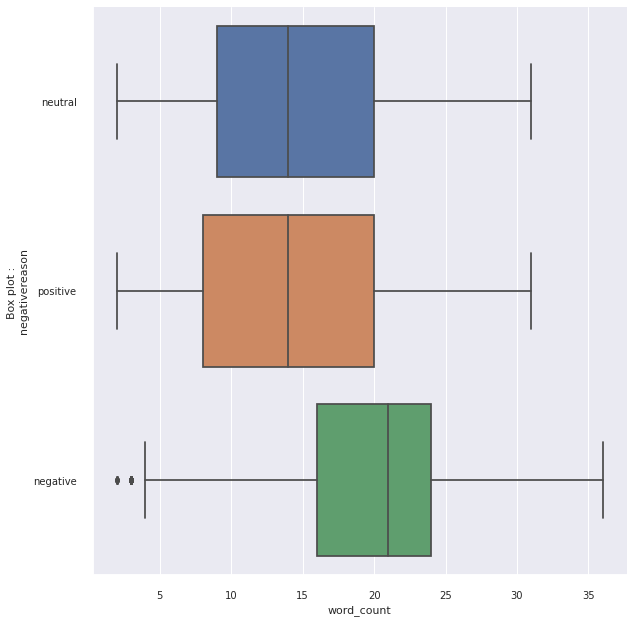

In [43]:
# distribution of data on word_count


plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="word_count", 
            height=9, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

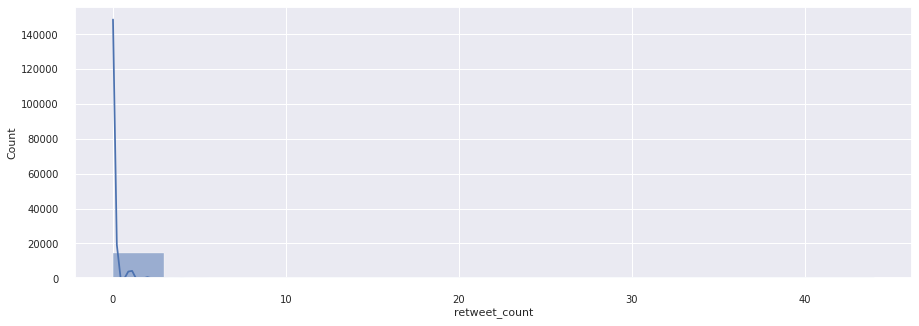

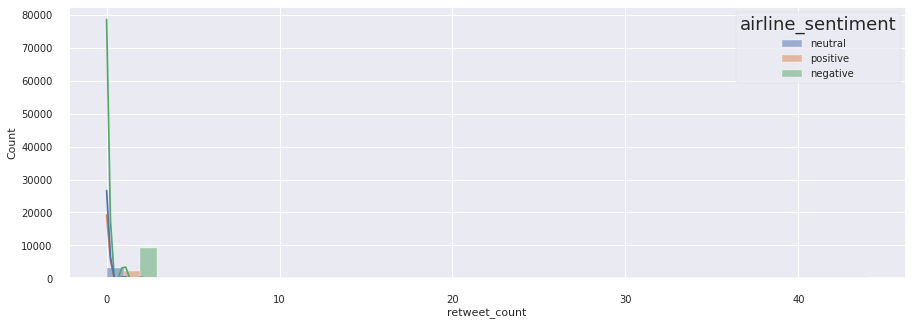

<Figure size 1080x360 with 0 Axes>

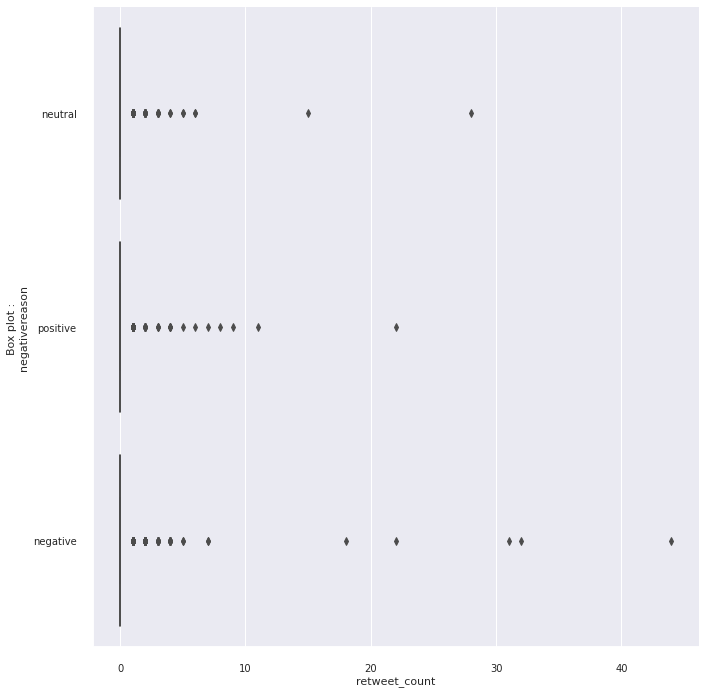

In [44]:
# distribution of data on retweet_count

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="retweet_count", 
            height=10, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

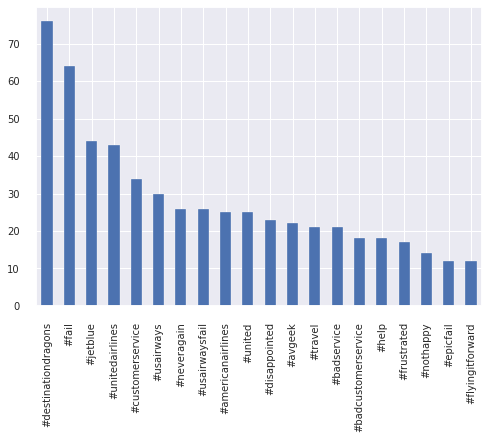

In [45]:
# top 20 occuring hashtags 
words = ' '.join(df_tweets['text'])

list_hashtags = [ x.lower() for x in words.split() if x.startswith("#")\
                    and x not in ["#"]]
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

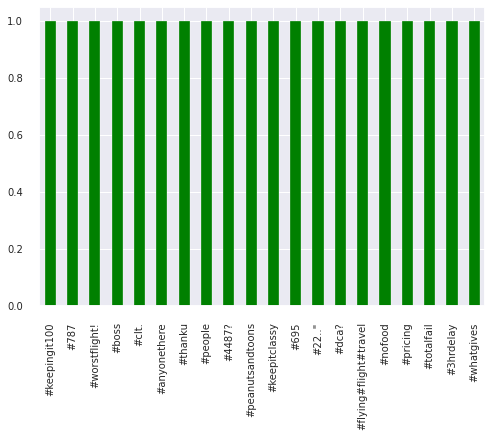

In [46]:
# rare 20 hashtags
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).tail(20).plot(kind="bar",
                                                            color="Green")

In [47]:
# all hashtags, including repeatitions
str_hashtags = " ".join(list_hashtags)
str_hashtags

'#fabulous #seductive #stress #29daystogo #fail #vx358 #noair #worstflightever #roasted #sfotobos #sendambien #andchexmix #moodlitmonday #sciencebehindtheexperience #moodlitmonday #travelhelp #elevategold #tribute #soundofmusic #oscars2015 #guiltypleasures #carrieunderwood #cmfat35000feet #neverflyvirginforbusiness #inflight #flightattendant #dreampath #neverflyvirgin #change #nomorevirgin #uncomfortable #sfo2lax #sneaky #customerservice #virginamerica #flying #sarcasm #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #phl #pleasecomeback #vabeatsjblue #oscars2015 #likingyoulessandless #oscars #redcarpet #oscars #oscars2015 #frustrated #lame #irmafromdallas #princesshalf #flight #dc #sunset #globe #backtowinter #work! #refreshed #redwineisbetter #emirates #baggageissues #smh #southwestair #flights #disappointed #elevate #gold #worst #flight #americanairlines #disappointed. #expected #beatstheothers #seriously #soreback #diehardv

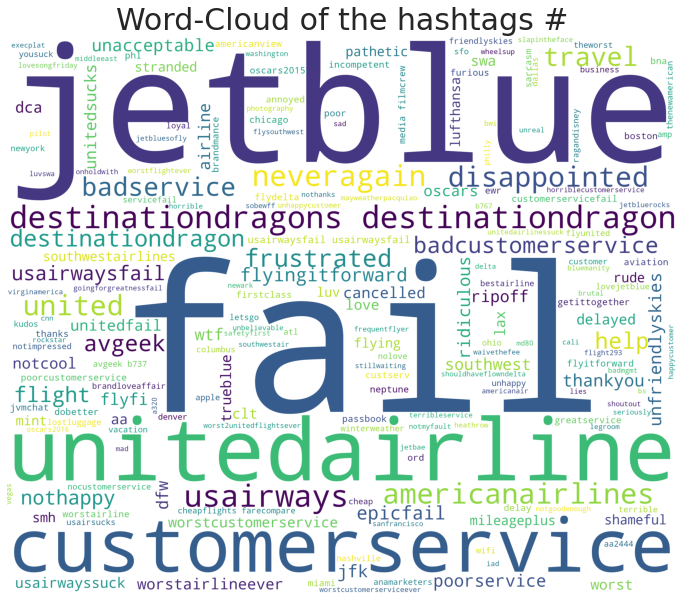

CPU times: user 19.8 s, sys: 700 ms, total: 20.5 s
Wall time: 20.4 s


In [48]:
%%time
wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2500
                    ).generate(str_hashtags)

plt.figure(1,figsize=(12, 12))
plt.title("Word-Cloud of the hashtags #",
          fontsize=30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

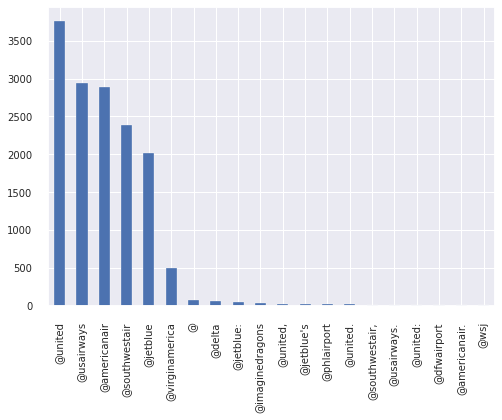

In [49]:
# top 20 occuring mentions  
# words = ' '.join(df_tweets['text'])

list_mentions = [ x.lower() for x in words.split() if x.startswith("@")]
pd.Series(list_mentions, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

# 3. Data Pre-Processing

The "text" feature would be used for Sentiment analysis on target variable "airline_sentiment"


From Rubiric,

Each text pre-processing step should be mentioned in the notebook separately. a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) i. Print the first 5 rows of data after pre-processing.

* Remove duplicates below:

In [50]:
df_tweets.drop_duplicates(inplace=True)
df_tweets.shape

(14604, 16)

In [51]:
# make a copy of dataset, 
# keeping only relevant features containing information 
df_data = df_tweets[["text","airline_sentiment"]]
df_data

text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  
0       neutral          
1      positive          
2       neutral          
3      negative          
4      negative          
...                 ...  
14635  positive          
14636  negative          
14637   neutral          
14638  negative          
14639   neutral          

[14604 rows x 2 columns]

In [52]:
df_data.head(5)

text                                                                                                                             \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  airline_sentiment  
0   neutral          
1  positive          
2   neutral          
3  negative          
4  negative

In [53]:
df_data.sample(20)

text                                                                                                                                                \
10132          @USAirways @AmericanAir my friends are stranded at KPHL and the representatives there won't even give them food vouchers…any help please?   
7581                                                                                             @JetBlue it's only because I'm wearing #TrueBlueColors!   
9461                                                                     @USAirways They were breathing very heavily. but were super helpful. Thank you.   
14320             @AmericanAir i was just severely upset by the rude cs rep. I get she's prob stressed, but I am too! An "aw, let me help" cld mk it btr   
9615               @USAirways Raleigh to Chicago and no #firstclass upgrade. Must be flying AA 'the screw USAir Elite, after we bailed them out' Airline   
440                                                                     @VirginAmerica ​ is flying from Love to Austin now. That is most excellent news.   
14262                                                                @AmericanAir ...is this how you want to treat your platinum (and two gold) flyers??   
13053                                                          @AmericanAir Thanks gang! Mind if I ask, do you handle all of your Social Media in house?   
11324                                                                                                @USAirways so far I've gotten six different answers   
3924                                                                            @united The link in the message I was replying to. #3thparty #ITproblems   
1847                                                                                      @united no. I need you to have more than 2 agents at check in.   
14637                                                                                       @AmericanAir Please bring American Airlines to #BlackBerry10   
7560                                                                                           @JetBlue any idea when the flight will actually take off?   
1441                                                    @united either your staff or whoever you contract with at PVD is failing you big time tonight...   
2495                                                                                        @united what incentive do I have to give you another chance?   
5351   @SouthwestAir 2 hours on hold trying to reschedule Cancelled Flightled flight. Hold music stopped, but no one's answering. How can I reach a rep?   
2264                                                                                                 @united that's great! pls let me know when u start!   
6492               @SouthwestAir can I get any kind of update on the delayed flight from Boston to Houston at 7:30? Really need to be back home tonight!   
10523                                                                             @USAirways you are cutting into my pregame time.  Go @KentuckyMBB !!!!   
14355        @AmericanAir I need to change a ticket and my res can't be changed online.  I also can't get a call through due to high volume--can u help?   

      airline_sentiment  
10132  negative          
7581   positive          
9461   positive          
14320  negative          
9615   negative          
440    positive          
14262  negative          
13053  positive          
11324  negative          
3924    neutral          
1847   negative          
14637   neutral          
7560    neutral          
1441   negative          
2495   negative          
5351   negative          
2264   positive          
6492   negative          
10523  negative          
14355  negative

### Observation by Sanjib:

Following pre-processing of text are required:


    1. Remove : (They do not contribute to sentiments)

      1.1 Remove HTML Tags.

      1.2 Remove mentions tags starting with '@', currency '$'. 
      
      1.3 Remove numbers.
      
      (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

      1.4 Removal of URL’s.


    2. Replace contractions in string (e.g. replace "I'm" with "I am")


    3. Tokenize text. Remove Stopwords. Before removing,
    please shortlist the stopwords that are meaningful to determine sentiment.


    4. Replacement:

      4.1 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
      
      4.2 Replace emojicons (e.g. :>, :-< ) with meaningful words>  

      
    5. Removal of non-ASCII characters.

    6. Removal of Punctuation.

    7. Conversion of all characters to lowercase.
    
    8. Lemmatize text. (preffered over stemming)

Note: Removing various texts early, helps performance of later processing steps.


## 3.1 Toeknization

Followed by WordCloud Visualization

In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
nltk.word_tokenize(
    "I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	")

# df_clean_tweet['clean_text'] = df_clean_tweet.apply(lambda row: nltk.word_tokenize(row['clean_text']), 
#                                                  axis=1) # Tokenization of data
# df_clean_tweet                                                 

['I',
 "'ve",
 'tried',
 'both',
 'desktop',
 'and',
 'mobile',
 ',',
 ':',
 '-',
 '(',
 ')',
 'http',
 ':',
 '//t.co/AvyqdMpi1Y',
 '.',
 'negative',
 '😭😭']

### Observation by Sanjib:

  1. The tokenization breaks an URL. Entire URL needs to be removed, because URL contains no information regarding sentiment classification.

  For the time being, we'll proceed with normalization only, as follows.



## 3.2 Normalization

In [56]:
%%time

# Spelling Correction: unit testing the libray with one smaple, 
str(TextBlob(
"I'll book my next Christmas vacatinn this Deceber any other ways you want to devalue mileage plus."
).correct())


CPU times: user 385 ms, sys: 1.04 ms, total: 386 ms
Wall time: 385 ms


"I'll book my next Christmas vacation this December any other ways you want to value mileage plus."

###Observation by Sanjib:

  1. The spelling check operation comsumes significant time. This needs to be performed after words are removed.

In [57]:
# emoji
%%time
# import emoji
emoji.demojize("united :-( customer service 👎", delimiters=("",""))

CPU times: user 67.1 ms, sys: 1.94 ms, total: 69 ms
Wall time: 68.1 ms


'united :-( customer service thumbs_down'

In [58]:
%%time 
text = "@United I am delighted ✈️ 😃 👍"
print (emoji.demojize( text,  delimiters=("","")) )

@United I am delighted airplane grinning_face_with_big_eyes thumbs_up
CPU times: user 388 µs, sys: 0 ns, total: 388 µs
Wall time: 359 µs


In [59]:
%%time
def replace_emojicons(str_p : str):
    """
      Desc: Replace following emoticons with meaningful
            words - happy, disgusting, surprise  
      Params:
        str_p : str = string where to replace
      Returns:
        str = string after replace
    """    
    # start_time = datetime.now()

    ##
    for ch in [":)", ":):)", ":-)", ":-))", ":-3", ":3"
               ":-{)", ":-):-)", ":-]", ":->", ":>", "8)",
               "8-)", ":-}", ":}", ":o)", "=3", "B^D", 
               ":c)", "c:", ":c)" "C:", ":^)", "=]", "=)",
               ";D", ";>", ";)", ";-)", ";]", ";-]", ";>",
               "O:-)", "O:)", "0:-3", "0:)", "0:-)", "0:)",
               "(^_^)/", "(^O^)／", "(＾ｖ＾)", ";p"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " happy " )

        

    ##
    for ch in [":(", ":(:(", ":-(", ":-c", ":c", ":-<", 
               ":<", ":-[", ":[", ":-[", ":-||", ">:[",  
               ":-{(", ":-(:-(", ":{", ":@", ";(", ":'(",
               ":'-(", ":=(", "D-'", "D:<", "D:", "D8",
               "D;", "D=", "DX", ":S", ":-/", ":/", ">:\\",
               ">:/", ":L", "8====D", "</3", "<\3", "8-X",
               "8=X", "x-3", "x=3"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " disgusting " )

    ##
    for ch in [":O", ":-O", ":o", ":-o", "8-0", ">:O",
               ":0", ":-0", "(@_@)", "(*_*)"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " surprise " )

    # print("replace_emojicons() duration {}".format(
    # datetime.now() - start_time))      

    return str_p


 # unit testing 
replace_emojicons("united :-( customer service 👎")


CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 17.6 µs


In [60]:
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
%%time

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
              'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
              "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
              "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, 
# so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 
stopwords.append("w/")     

lemmatizer = WordNetLemmatizer()



############################################
def lemmatize_list(words):
    """Lemmatize"""
    # start_time = datetime.now()   
    # new_words = []
    # for word in words.split():
    #   new_words.append(" ")
    #   new_words.append(lemmatizer.lemmatize(word, pos='v'))

    new_words = [lemmatizer.lemmatize(word, 
                      pos='v') for word in words.split()]
 
    # print("lemmatize_list() duration = {}".format(
    #   datetime.now() - start_time))     
    return " ".join(new_words)

# Examples : Unit testing
text = "Couldn't make changes online and after 90 mins on hold and time" +\
" dealing w/ the rude rep, the 24 hour window has closed."
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )



Testing lemmatize_list : Couldn't make change online and after 90 mins on hold and time deal w/ the rude rep, the 24 hour window have closed.
CPU times: user 1.51 s, sys: 63 ms, total: 1.58 s
Wall time: 1.54 s


In [62]:
%%time

# Examples : Unit testing
text = "@united I had one interview I was the last person what does that mean?"
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )

Testing lemmatize_list : @united I have one interview I be the last person what do that mean?
CPU times: user 193 µs, sys: 10 µs, total: 203 µs
Wall time: 165 µs


In [63]:
%%time 
text = "united :-( customer service 👎. I am disappointed"
unicodedata.normalize('NFKD', text).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.9 µs


In [64]:
%%time

############################################
def strip_html(text):
    # start_time = datetime.now()
    soup = BeautifulSoup(text, "html.parser")  
    # print("remove_numbers duration {}".format(
    # datetime.now() - start_time))                  
    return soup.get_text()

# Examples : Unit testing
text = "<h1>This is my website</h1>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my website
CPU times: user 0 ns, sys: 335 µs, total: 335 µs
Wall time: 318 µs


In [65]:
%%time

# Examples : Unit testing
text = "<h1>This is my website</h1><h2>Details here</h2>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my websiteDetails here
CPU times: user 530 µs, sys: 29 µs, total: 559 µs
Wall time: 402 µs


In [66]:


############################################

def remove_numbers(text):
  #remove the numericals present in the text
  # start_time = datetime.now()
  text = re.sub(r'\d+', '', text)
  # print("remove_numbers duration {}".format(
  #     datetime.now() - start_time))
  return text

# Examples : Unit testing
text = "@united A change fee of $200. Same exact flight from ATL-HOU is " +\
"$165. Why a charge of $574? The math doesn't add up."
print("Testing remove_numbers :" ,remove_numbers(text) )

############################################
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # start_time = datetime.now()

    new_words = unicodedata.normalize('NFKD', 
                      words).encode('ascii', 
                                  'ignore').decode('utf-8', 'ignore')
    # print("remove_non_ascii() duration = {}".format(
    # datetime.now() - start_time))  
    return new_words

# Examples : Unit testing
text = "united :-( customer service 👎"
print("Testing remove_non_ascii() :" ,
      remove_non_ascii(text) )

############################################
# def to_lowercase(words):
#     """Convert all characters to lowercase from list of tokenized words"""
#     new_words = []
#     for word in words.split():
#         new_words.append(" ")
#         new_word = word.lower()
#         new_words.append(new_word)
#     return "".join(new_words)

    
# # Examples : Unit testing
# text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
# print("Testing to_lowercase :" ,
#       to_lowercase(text) )

############################################
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    # start_time = datetime.now()
    new_words = []
    # for word in words.split():
        # as tweets may not have whitespace along with punctuations always,
        # we are going to add whitespace in place of punctuations 
    new_words = re.sub(r'[^\w\s]', ' ', words)
        # if new_word != ' ':
        #     new_words.append(" ")
        #     new_words.append(new_word)
    # print("remove_punctuation() duration = {}".format(
    # datetime.now() - start_time)) 
    return new_words

# Examples : Unit testing
text = "@united WTF!?!? Delay after delay. 15 hours YVR to SAN? Unacceptable."
print("Testing remove_punctuation() :" ,
      "".join(remove_punctuation(text)) )    

############################################
def remove_stopwords_lower(words):
    """Remove stop words from list of tokenized words"""
    # start_time = datetime.now()

    # new_words = []
    # for word in words.split():
    #     if word not in stopwords:
    #         new_words.append(" ")
    #         new_words.append(word)
    new_words = [word.lower() for word in words.split() \
                    if word not in stopwords]

    # print("remove_stopwords() duration = {}".format(
    # datetime.now() - start_time))         
    return " ".join(new_words)

# Examples : Unit testing
text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
print("Testing remove_stopwords_lower :" ,
      "".join(remove_stopwords_lower(text)) )



############################################
# # Function for url's
# def remove_urls(text):
#     # url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     # return url_pattern.sub(r'', text)
#     start_time = datetime.now()
#     text = re.sub(
#     'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
#     '',text)
#     print("remove_urls() duration = {}".format(
#       datetime.now() - start_time))
#     return text

# # Examples : Unit testing
# text = "This is my website. Website is https://to.abc.com"
# print("Testing remove_urls() :" ,remove_urls(text) )


############################################

#expand the contractions

# def replace_contractions(text):
#     """Replace contractions in string of text"""
#     return contractions.fix(text)

# Examples : Unit testing
text = "Couldn't make changes online"
print("Testing replace_contractions :" ,
      contractions.fix(text) )


Testing remove_numbers : @united A change fee of $. Same exact flight from ATL-HOU is $. Why a charge of $? The math doesn't add up.
Testing remove_non_ascii() : united :-( customer service 
Testing remove_punctuation() :  united WTF     Delay after delay  15 hours YVR to SAN  Unacceptable 
Testing remove_stopwords_lower : flight crew availability blame? never again @united.
Testing replace_contractions : could not make changes online


In [67]:
%%time
############################################


def remove_mention_number_dollar_url(text_p : str):
    """
      Description: 
        remove the followings in the tweets
        mention, decimal, integer, dollar-currency, 
        URL, punctuation
    """
    # start_time = datetime.now()

    text_p = re.sub(
    r'@\w+|\d+(\.\d*)?|\$|http[s]?://(?:' +\
    '[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'+\
    '' #'|[^\w\s]' # removing punctuation removed emoji
    ,
    '',text_p)

    # print(
    # "remove_mention_number_dollar_url_punctuation() duration = {}".format(
    #   datetime.now() - start_time))
    return text_p

# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 917 µs, sys: 0 ns, total: 917 µs
Wall time: 790 µs


In [68]:
%%time
# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 130 µs, sys: 7 µs, total: 137 µs
Wall time: 90.8 µs


In [69]:
%%time
"Here are ABC.".lower()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


'here are abc.'

In [70]:
re.sub('[^\w\s]','',"thumbs_up") 

'thumbs_up'

In [71]:
%%time

############################################
def normalize(words):
    """
      Desc: 
        Wrapper function of all text pre-processing
      Params:
        words : str 
      Return:
        str = Cleaned Text  
    """

    """


    1. Remove : (They do not contribute to sentiments)

      1.1 Remove HTML Tags.

      1.2 Remove mentions tags starting with '@', currency '$'. 
      
      1.3 Remove numbers.
      
      (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

      1.4 Removal of URL’s.


    2. Replace contractions in string (e.g. replace "I'm" with "I am")


    3. Tokenize text. Remove Stopwords. Before removing,
    please shortlist the stopwords that are meaningful to determine sentiment.


    4. Replacement:

      4.1 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
      
      4.2 Replace emojicons (e.g. :>, :-< ) with meaningful words>  

      
    5. Removal of non-ASCII characters.

    6. Removal of Punctuation.

    7. Conversion of all characters to lowercase.
    
    8. Lemmatize text. (preffered over stemming)

    """

    strip_html

    words = remove_mention_number_dollar_url(words)
    # print(words)
    
    words = contractions.fix(words)
    # print(words)
    
    words = remove_stopwords_lower(words)
    # print(words)

    # words = remove_punctuation(words)
    # print(words)
    # words = remove_non_ascii(words)


    # words = to_lowercase(words)
    # words = words.lower()

    words = emoji.demojize(words, delimiters=(" "," "))
    words = replace_emojicons(words)
    # print(words)

    #remove punctuations
    words = re.sub('[^\w\s]','',words) 
    #remove non-ascii
    words = unicodedata.normalize('NFKD', words
          ).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

    # The spelling correction took long processing time
    # words = str(TextBlob(words).correct())

    words = lemmatize_list(words)
    return words

#Unit testing
print(normalize(
"I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 646 µs, sys: 0 ns, total: 646 µs
Wall time: 606 µs


In [72]:
%%time 
#Unit testing
print(normalize(
"I've tried both desktop and mobile, :( http://t.co/AvyqdMpi1Y	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 624 µs, sys: 0 ns, total: 624 µs
Wall time: 566 µs


In [73]:
%%time 

df_data["clean_text"] = df_data.apply(lambda row: normalize(row["text"]),
                                      axis=1)
df_data

CPU times: user 7.41 s, sys: 34.9 ms, total: 7.44 s
Wall time: 7.42 s


In [74]:
# %%time
# np.vectorize(normalize)(df_data["text"])

In [75]:
# save to disk
df_data.to_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv",index=True)

In [76]:
df_data.sample(20)

text                                                                                                                                                     \
14378                                                          @AmericanAir man we have been sitting in #UA4753 on the tarmac for 30 mins...rescue us please!   
9638                                   @USAirways Finally got ahold of an Agent after another hour. Thanks for the follow up.  Recommend a call back feature.   
1702                              @united the bag is in a state that I didn't travel to and the airports don't fly to each other. Looks like it'll never show   
1977                   @united no HUMAN contact for 2 mths from @AmericanAir cust relations or refund dept. If ever a problem do u have humans I can talk to?   
10799                                                                                                @nrhodes85: look! Another apology. DO NOT FLY @USAirways   
5255                                                                                    @SouthwestAir the wait for the bags is longer than the actual flight.   
8534             @JetBlue if u want to be helpful save me the trip from Westchester Cty to JFK, plus parking - my info is in the photo http://t.co/JI7xkS2jkk   
1771        @united thanks for ruined my vacation for having poorly maintained aircrafts that can’t fly safely out of STT. #UA1481 #Cancelled Flightledflight   
13292  @AmericanAir has the worst flights and customer service, this is the second time I've been Cancelled Flighted. Gotta pay for hotel and find rides now.   
12280             Yes, and it gets disconnected due to the lack of WIFI strength “@AmericanAir: @MauererPower Have you reached out to @Gogo for help, David?”   
7713    @JetBlue Flight 2202 out of JFK, 2 &amp; 1/2 hr delay. I could get over it if it was just  weather reLate Flightd, but considering it's not - Come on   
11514                        @USAirways so the seat next to me (19B) on flight 1943 to Seattle has a tray table that is falling off... http://t.co/HAJ5lKqjW4   
3836                                                                                  @united ha, this happened 10 years ago. i haven't flown with you since.   
1274                                              @united also forgot add our bag is probably going to just sit in New Jersey because of a missed connection.   
10054                                                   @USAirways all these planes sitting here and no one going home. #usairwaysfail http://t.co/jN3V3k3qGv   
11872                  @USAirways your service has been awful in Boston and I had to pay 25 extra dollars than I was supposed too I am very dissatisfied #mad   
6744                                                  @SouthwestAir you guys there? Are we on hour 2 of our phone hold at 3am bc of volume or short staffing?   
3995              @united I am a frequent user. Congrats u only lost my bags once in 20 years. Problem, it was today and your staff were rude!😢 still no bag!   
6018                     @SouthwestAir Is there an email address I can send some thoughts to? This experience was really not good &amp; I have some feedback.   
9262                                                         @USAirways what's up with flight 5545 no gate agent or plane at PHX B18?  Nice customer service.   

      airline_sentiment  \
14378  negative           
9638   negative           
1702   negative           
1977   negative           
10799  negative           
5255   negative           
8534   negative           
1771   negative           
13292  negative           
12280  negative           
7713   negative           
11514  negative           
3836    neutral           
1274   negative           
10054  negative           
11872  negative           
6744   negative           
3995   negative           
6018   negative           
9262   negative           

      clean_text                                        

In [77]:
# reading from disk to ensure that save was successful
df_clean_tweet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv")

In [78]:
df_clean_tweet

Unnamed: 0  \
0          0        
1          1        
2          2        
3          3        
4          4        
...           ...   
14599  14635        
14600  14636        
14601  14637        
14602  14638        
14603  14639        

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14599                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14600  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14601                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14602                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14603              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  \
0       neutral           
1      positive           
2       neutral           
3      negative           
4      negative           
...                 ...   
14599  positive           
14600  negative           
14601   neutral           
14602  negative           
14603   neutral           

      clean_text                                                                                     
0                                                                                          what say  
1                                                             plus add commercials experience tacky  
2                                                    i not today must mean i need take another trip  
3                   really aggressive blast obnoxious entertainment guests face amp little recourse  
4                                                                              really big bad thing  
...                                                                                             ...  
14599                                                            thank get different flight chicago  
14600  leave minutes late flight no warn communication minutes late flight call shitty customer svc  
14601                                                     please bring american airlines blackberry  
14602                        money change flight not answer phone any suggestions i make commitment  
14603                     ppl need know many seat next flight plz put us standby people next flight  

[14604 rows x 4 columns]

# 4. Feature Enggineering - Basic




## 4.1 Features of CountVectorizer 

In [79]:
# bow_vec1 = CountVectorizer()  
# data_features1 = bow_vec1.fit_transform(
#     df_clean_tweet['clean_text'])

# data_features1 = data_features1.toarray()                        # Convert the data features to array.
# data_features1.shape

In [80]:
# Keep only 2000 features as number of features will increase the processing time.
bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features = data_features.toarray()  
data_features       

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [81]:
data_features.shape

(14604, 2000)

In [82]:
# summarize
print(bow_vec.vocabulary_)

{'what': 1922, 'say': 1519, 'plus': 1315, 'add': 24, 'experience': 617, 'not': 1171, 'today': 1772, 'must': 1134, 'mean': 1066, 'need': 1147, 'take': 1705, 'another': 88, 'trip': 1802, 'really': 1407, 'entertainment': 580, 'face': 633, 'amp': 79, 'little': 1004, 'big': 206, 'bad': 164, 'thing': 1741, 'seriously': 1544, 'would': 1968, 'pay': 1268, 'flight': 688, 'seat': 1528, 'play': 1310, 'fly': 704, 'va': 1868, 'yes': 1984, 'nearly': 1146, 'every': 597, 'time': 1765, 'vx': 1887, 'go': 767, 'away': 157, 'happy': 798, 'miss': 1107, 'opportunity': 1216, 'without': 1953, 'hat': 802, 'there': 1738, 'well': 1919, 'now': 1180, 'do': 526, 'amaze': 73, 'arrive': 117, 'hour': 848, 'early': 551, 'good': 771, 'me': 1063, 'know': 957, 'suicide': 1680, 'second': 1530, 'lead': 978, 'death': 460, 'among': 77, 'teens': 1718, 'lt': 1033, 'pretty': 1346, 'much': 1131, 'better': 203, 'this': 1745, 'great': 774, 'deal': 458, 'already': 67, 'think': 1743, 'nd': 1144, 'even': 593, 'st': 1640, 'yet': 1986, '

### Observation by Sanjib:

1. Apparaently the selected features do not have spelling mistakes.




## 4.2 Features of TF-IDF Vectorizer

In [83]:
# create the transform
tf_idf_vectorizer = TfidfVectorizer(max_features=2000)
# tokenize and build vocab
data_features_tf_idf = tf_idf_vectorizer.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features_tf_idf = data_features_tf_idf.toarray()

data_features_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
# summarize
data_features_tf_idf.shape

(14604, 2000)

In [85]:
# summarize
print(tf_idf_vectorizer.vocabulary_)
print(tf_idf_vectorizer.idf_)

{'what': 1922, 'say': 1519, 'plus': 1315, 'add': 24, 'experience': 617, 'not': 1171, 'today': 1772, 'must': 1134, 'mean': 1066, 'need': 1147, 'take': 1705, 'another': 88, 'trip': 1802, 'really': 1407, 'entertainment': 580, 'face': 633, 'amp': 79, 'little': 1004, 'big': 206, 'bad': 164, 'thing': 1741, 'seriously': 1544, 'would': 1968, 'pay': 1268, 'flight': 688, 'seat': 1528, 'play': 1310, 'fly': 704, 'va': 1868, 'yes': 1984, 'nearly': 1146, 'every': 597, 'time': 1765, 'vx': 1887, 'go': 767, 'away': 157, 'happy': 798, 'miss': 1107, 'opportunity': 1216, 'without': 1953, 'hat': 802, 'there': 1738, 'well': 1919, 'now': 1180, 'do': 526, 'amaze': 73, 'arrive': 117, 'hour': 848, 'early': 551, 'good': 771, 'me': 1063, 'know': 957, 'suicide': 1680, 'second': 1530, 'lead': 978, 'death': 460, 'among': 77, 'teens': 1718, 'lt': 1033, 'pretty': 1346, 'much': 1131, 'better': 203, 'this': 1745, 'great': 774, 'deal': 458, 'already': 67, 'think': 1743, 'nd': 1144, 'even': 593, 'st': 1640, 'yet': 1986, '

# 5. Data Split

Spilt the dataset into -

train :: test = 80 :: 20

Assumption : The cross-validation would be part of the algorithm  

In [86]:
# To achieve consistency
seed_value = 7

np.random.seed(seed_value)
tf.random.set_seed(seed_value)

y=df_clean_tweet["airline_sentiment"] 
y.value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

In [87]:
# Encode classes into numbers
y = y.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y

0        1
1        2
2        1
3        0
4        0
        ..
14599    2
14600    0
14601    1
14602    0
14603    1
Name: airline_sentiment, Length: 14604, dtype: uint8

## 5.1 TF-IDF Features

In [88]:
%%time

# Split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame( data_features_tf_idf, 
                 index=df_clean_tweet.index,
                 dtype="float32"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (11683, 2000)
X_test (2921, 2000)
y_train (11683,)
y_test (2921,)
CPU times: user 47.9 ms, sys: 44.1 ms, total: 92 ms
Wall time: 91.2 ms


In [89]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train.value_counts(normalize=True))
print("="*40)
print(y_test.value_counts(normalize=True))
print("="*40)

0   0.6272
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64
0   0.6272
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64
0   0.6272
1   0.2116
2   0.1612
Name: airline_sentiment, dtype: float64


In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 1591 to 14443
Columns: 2000 entries, 0 to 1999
dtypes: float32(2000)
memory usage: 89.2 MB


In [91]:
X_train.sample(10)

0      1      2      3      4      5      6      7      8      9      \
4732  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
8886  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3124  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11872 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6901  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
568   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4339  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12392 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3606  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12552 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       10     11     12     13     14     15     16     17     18     19     \
4732  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
8886  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3124  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11872 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6901  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
568   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4339  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12392 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3606  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12552 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       20     21     22     23     24     25     26     27     28     29     \
4732  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
8886  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3124  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11872 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6901  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
568   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4339  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12392 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3606  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12552 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       30     31     32     33     34     35     36     37     38     39     \
4732  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
8886  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3124  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11872 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6901  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
568   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4339  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12392 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3606  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12552 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       40     41     42     43     44     45     46     47     48     49     \
4732  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
8886  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3124  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11872 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6901  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
568   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.000

In [92]:
y_train

1591     0
636      0
8897     0
3139     0
9076     0
        ..
14346    2
3232     0
3258     0
10705    0
14443    0
Name: airline_sentiment, Length: 11683, dtype: uint8

In [93]:
# %%time

# # Split dataset into validation and test

# X_val, X_test, y_val, y_test = train_test_split(
#     X_test,
#     y_test, 
#     test_size=0.5, 
#     random_state=10,
#     stratify=y_test)


# print("X_val", X_val.shape)
# print("X_test", X_test.shape)
# print("y_val", y_val.shape)
# print("y_test", y_test.shape)

In [94]:
# # check if the distrution of target classes are preserved after dataset split

# print(y.value_counts(normalize=True))
# print("="*40)
# print(y_val.value_counts(normalize=True))
# print("="*40)
# print(y_test.value_counts(normalize=True))
# print("="*40)

## 5.2 Count Vectorizer (Bag of Words) Features

In [95]:
# Big of Word, Count Vectorizer

print(data_features.max(), data_features.min(), data_features.mean())

32 0 0.004294987674609696


In [96]:
data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
%%time

# Split dataset into train and test

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    pd.DataFrame( data_features, 
                 index=df_clean_tweet.index,
                 dtype="uint8"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_bow", X_train_bow.shape)
print("X_test_bow", X_test_bow.shape)
print("y_train_bow", y_train_bow.shape)
print("y_test_bow", y_test_bow.shape)

X_train_bow (11683, 2000)
X_test_bow (2921, 2000)
y_train_bow (11683,)
y_test_bow (2921,)
CPU times: user 42.4 ms, sys: 15.1 ms, total: 57.5 ms
Wall time: 56.4 ms


In [98]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_bow.value_counts(normalize=True))
print("="*40)
print(y_test_bow.value_counts(normalize=True))
print("="*40)

0   0.6272
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64
0   0.6272
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64
0   0.6272
1   0.2116
2   0.1612
Name: airline_sentiment, dtype: float64


In [99]:
X_train_bow.sample(10)

0     1     2     3     4     5     6     7     8     9     10    11    \
4112   0     0     0     0     0     0     0     0     0     0     0     0      
11465  0     0     0     0     0     0     0     0     0     0     0     0      
9080   0     0     0     0     0     0     0     0     0     0     0     0      
5906   0     0     0     0     0     0     0     0     0     0     0     0      
1023   0     0     0     0     0     0     0     0     0     0     0     0      
10670  0     0     0     0     0     0     0     0     0     0     0     0      
13110  1     0     0     0     0     0     0     0     0     0     0     0      
6054   0     0     0     0     0     0     0     0     0     0     0     0      
9125   0     0     0     0     0     0     0     0     0     0     0     0      
346    0     0     0     0     0     0     0     0     0     0     0     0      

       12    13    14    15    16    17    18    19    20    21    22    23    \
4112   0     0     0     0     0     0     0     0     0     0     0     0      
11465  0     0     0     0     0     0     0     0     0     0     0     0      
9080   0     0     0     0     0     0     0     0     0     0     0     0      
5906   0     0     0     0     0     0     0     0     1     0     0     0      
1023   0     0     0     0     0     0     0     0     0     0     0     0      
10670  0     0     0     0     0     0     0     0     0     0     0     0      
13110  0     0     0     0     0     0     0     0     0     0     0     0      
6054   0     0     0     0     0     0     0     0     0     0     0     0      
9125   0     0     0     0     0     0     0     0     0     0     0     0      
346    0     0     0     0     0     0     0     0     0     0     0     0      

       24    25    26    27    28    29    30    31    32    33    34    35    \
4112   0     0     0     0     0     0     0     0     0     0     0     0      
11465  0     0     0     0     0     0     0     0     0     0     0     0      
9080   0     0     0     0     0     0     0     0     0     0     0     0      
5906   0     0     0     0     0     0     0     0     0     0     0     0      
1023   0     0     0     0     0     0     0     0     0     0     0     0      
10670  0     0     0     0     0     0     0     0     0     0     0     0      
13110  0     0     0     0     0     0     0     0     0     0     0     0      
6054   0     0     0     0     0     0     0     0     0     0     0     0      
9125   0     0     0     0     0     0     0     0     0     0     0     0      
346    0     0     0     0     0     0     0     0     0     0     0     0      

       36    37    38    39    40    41    42    43    44    45    46    47    \
4112   0     0     0     0     0     0     0     0     0     0     0     0      
11465  0     0     0     0     0     0     0     0     0     0     0     0      
9080   0     0     0     0     0     0     0     0     0     0     0     0      
5906   0     0     0     0     0     0     0     0     0     0     0     0      
1023   0     0     0     0     0     0     0     0     0     0     0     0      
10670  0     0     0     0     0     0     0     0     0     0     0     0      
13110  0     0     0     0     0     0     0     0     0     0     0     0      
6054   0     0     0     0     0     0     0     1     0     0     0     0      
9125   0     0     0     0     0     0     0     0     0     0     0     0      
346    0     0     0     0     0     0     0     0     0     0     0     0      

       48    49    ...  1950  1951  1952  1953  1954  1955  1956  1957  1958  \
4112   0     0     ...  0     0     0     0     0     0     0     0     0      
11465  0     0     ...  0     0     0     0     0     0     0     0     0      
9080   0     0     ...  0     0     0     0     0     0     0     0     0      
5906   0     0     ...  0     0     0     0     0     0     0     0     0      
1023   0     0     ...  0     0     0  

# 6. Build Model - Traditional RandomForest


Please note that many different algorithms of multi-class classification could have been tried, such as pruned Decision Tree, Random Forest, Ada boost, XGBoost, Simple Artificial Neural Network, etc.

However, deep learning models proforms normally better in NLP classification. They were tried subsequently. 

Note: Vader Analysis, TextBolb are not generally great at performance. We are going for better alogorithms next.


## 6.1 Random Forest Model with TF-IDF features

In [100]:
rf_tf = RandomForestClassifier(
    random_state=10,
    n_estimators=10, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_tf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [101]:
%%time
# Grid of parameters to choose from

parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,22),
    "max_features": [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "max_samples": [ 0.7, 0.8, 0.9, 1],
    "n_estimators": [8, 10, 20, 40, 60],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_tf.fit(X_train, y_train) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj = RandomizedSearchCV(
            estimator=rf_tf, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj = randomCV_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_class_randomCV = randomCV_obj.best_estimator_

# Fit the best algorithm to the data.
rf_class_randomCV.fit(X_train, y_train)

CPU times: user 39.9 s, sys: 2.11 s, total: 42 s
Wall time: 6min 2s


In [102]:
rf_class_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.6,
 'max_leaf_nodes': None,
 'max_samples': 0.7,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

### 6.1.1 Model Performance

In [103]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, 
    roc=False, desc=""
):
    """
    Description:
        Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    Parameters:
        desc: a description that would be added to the output result
        model: classifier to predict values of X
        train, test: Independent features
        train_y,test_y: Dependent variable
        threshold: thresold for classifiying the observation as 1
        flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
        roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    Returns:
        list with train and test scores
    """

    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict(train) 
    # print(pred_train)
    # > threshold  # predict_proba
    pred_test = model.predict(test)
    # print(pred_test) 
    # > threshold

    # pred_train = np.round(pred_train)
    # pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train, average='weighted')
    test_recall = recall_score(test_y, pred_test, average='weighted')

    train_precision = \
      precision_score(train_y, pred_train, average='weighted')
    test_precision = \
      precision_score(test_y, pred_test, average='weighted')

    train_f1 = f1_score(train_y, pred_train, average='weighted')
    test_f1 = f1_score(test_y, pred_test, average='weighted')

    # *********************************************************
    # NOTE : Because Average is chosen as "weighted", 
    # Accuracy-Test == Recall-Test
    # *********************************************************

    df_score = pd.DataFrame(dtype="float16")

    df_score["Description"] = (desc,)
    # df_score["Threshold"] = (threshold,)
    df_score["Accuracy-Train"] = (train_acc,)
    df_score["Accuracy-Test"] = (test_acc,)
    df_score["Precision-Train"] = (train_precision,)
    df_score["Precision-Test"] = (test_precision,)
    df_score["Recall-Train"] = (train_recall,)
    df_score["Recall-Test"] = (test_recall,)
    df_score["F1-Train"] = (train_f1,)
    df_score["F1-Test"] = (test_f1,)
    # df_score["ROC-AUC-Train"] = (np.nan,)
    # df_score["ROC-AUC-Test"] = np.nan

    # if roc == True:  # calculate ROC-AUC if flag is true
    #     pred_train_prob = model.predict(train)  # predict_proba
    #     pred_test_prob = model.predict(test)
    #     df_score.at[0, "ROC-AUC-Train"] = roc_auc_score(
    #         train_y, pred_train, average="weighted", multi_class='raise')
    #     df_score.at[0, "ROC-AUC-Test"] = roc_auc_score(
    #         test_y, pred_test, average="weighted", multi_class='raise')

    if flag == True:
        print(df_score)

    return df_score



def make_confusion_matrix(model, X_test, y_test,
            # history, 
            desc="", CATEGORIES=[0,1,2]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
      y_test,
      model.predict(X_test)
            )
  # print(cf_matrix)
  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, annot=True,
              cmap="YlGnBu", fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.title(desc)
  # sns.set_context("notebook")  # talk : bolds the plots



In [104]:
#test dataset is unseen

df_score_rf_randomCV = get_metrics_score(
    rf_class_randomCV,
    X_train,
    X_test,  # unseen data
    y_train,
    y_test,  # unseen data
    desc="RandomForest TF-IDF",
    roc=True,
)

  Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6975          0.6696         0.7901             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7509          0.6975        0.6696       0.7179    0.6896    


In [105]:
df_score_rf_randomCV 


Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6975          0.6696         0.7901             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7509          0.6975        0.6696       0.7179    0.6896

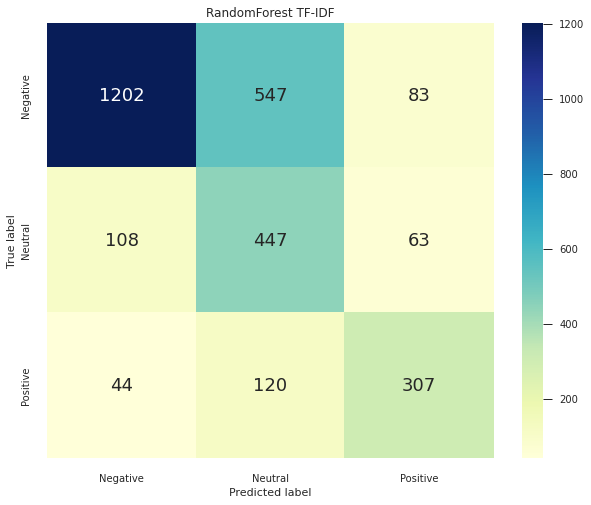

In [106]:
make_confusion_matrix(rf_class_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest TF-IDF",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [107]:
rf_class_randomCV.feature_importances_

array([1.12306488e-03, 5.44086106e-05, 5.93660387e-04, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [108]:
tf_idf_vectorizer.get_feature_names()

['aa',
 'aadvantage',
 'able',
 'about',
 'abq',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'accommodations',
 'accord',
 'account',
 'acct',
 'accurate',
 'across',
 'act',
 'action',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'admirals',
 'admit',
 'adopt',
 'advance',
 'advantage',
 'advertise',
 'advice',
 'advise',
 'advisory',
 'affect',
 'afford',
 'after',
 'afternoon',
 'again',
 'age',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahold',
 'air',
 'aircraft',
 'airfare',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'alert',
 'alist',
 'all',
 'alliance',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'alternate',
 'although',
 'always',
 'amaze',
 'america',
 'american',
 'americanairlines',
 'among',
 'amount',
 'amp',
 'an',
 'and',
 'angry',
 'anniversary',
 'announce',
 'announcement',
 'announcements',
 'annoy

In [109]:
# re-usable function


def feature_importance_in_tree(dTree, 
                               vectorizer,
                               feature_names=[], 
                               no_top_features=20,
                               model_name=""):
    """
    Description:
        Display importance of features (words) in the tree building , 
        by Gini importance.
        The words which influenced the model outcome largely.
        
    Parameters:
        dTree : Descision Tree Model
        feature_names : list of independent variable names
    Returns:
        dataframe containing the feature importance, sorted decending
    """

    df_imp = pd.DataFrame(
        dTree.feature_importances_,
        columns=["Importance"],
        index=feature_names,
    ).sort_values(by="Importance", ascending=False)

    df_imp = df_imp.head( no_top_features )

    names = vectorizer.get_feature_names()
    # count = 0
    names_dict = {}
    for i in np.arange(0,len(names)):
      # print(names[i])
      names_dict[i] = names[i]

    # print(names_dict)

    df_imp["Feature"]= df_imp.index.map(names_dict)

    print(df_imp)

    # sns.set_context("talk")  # talk : bolds the plots

    print("*"*60)
    print("The plot of Feature Importance, top", 
          str(no_top_features))

    # fig, axs = plt.subplots(figsize=(20, 5))
    # df_imp.plot(kind="bar", ax=axs, color="Green")
    # plt.title("Feature Importances")
    # plt.xlabel("Relative Importance")
    sns.catplot(
        data=df_imp,
        y="Feature",
        x="Importance",
        kind="bar",
        height=10
    )
    plt.show()

    # sns.set_context("notebook")  # reset to normal

    wordcloud = WordCloud(
                      background_color='grey',
                      width=2000,
                      height=1500,
    ).generate(" ".join(df_imp["Feature"]))

    print("*"*60)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.figure(1, figsize=(20, 15))
    plt.title('Top '+ str(no_top_features) +\
              ' features WordCloud', fontsize=30)
    plt.axis("off")
    plt.show()              

    return df_imp




      Importance Feature    
1730 0.2194            thank
1171 0.0706              not
774  0.0395            great
1027 0.0322             love
471  0.0286            delay
798  0.0237            happy
849  0.0223            hours
269  0.0212           cancel
831  0.0208             hold
1888 0.0154             wait
201  0.0149             best
432  0.0126         customer
158  0.0120          awesome
271  0.0119           cannot
264  0.0119             call
771  0.0117             good
73   0.0111            amaze
688  0.0097           flight
1964 0.0095            worst
1968 0.0082            would
848  0.0072             hour
169  0.0070              bag
1547 0.0066          service
187  0.0065               be
1020 0.0064             lose
522  0.0062               dm
108  0.0060       appreciate
267  0.0058              can
759  0.0054              get
820  0.0052               hi
1312 0.0051           please
1989 0.0044              you
957  0.0036             know
704  0.0031   

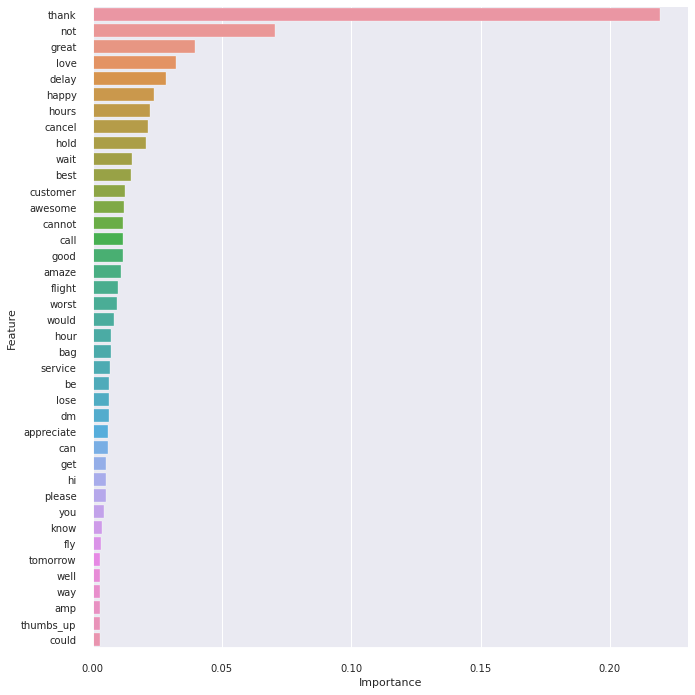

************************************************************


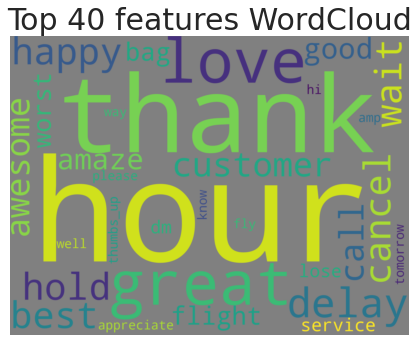

In [110]:
# display important word features that influenced model outcome

df_imp = feature_importance_in_tree(
    dTree=rf_class_randomCV, 
    vectorizer=tf_idf_vectorizer,
    feature_names=X_train.columns, 
    no_top_features = 40,
    model_name="RandomForest TF-IDF"
)

In [111]:
df_imp # display

Importance Feature    
1730 0.2194            thank
1171 0.0706              not
774  0.0395            great
1027 0.0322             love
471  0.0286            delay
798  0.0237            happy
849  0.0223            hours
269  0.0212           cancel
831  0.0208             hold
1888 0.0154             wait
201  0.0149             best
432  0.0126         customer
158  0.0120          awesome
271  0.0119           cannot
264  0.0119             call
771  0.0117             good
73   0.0111            amaze
688  0.0097           flight
1964 0.0095            worst
1968 0.0082            would
848  0.0072             hour
169  0.0070              bag
1547 0.0066          service
187  0.0065               be
1020 0.0064             lose
522  0.0062               dm
108  0.0060       appreciate
267  0.0058              can
759  0.0054              get
820  0.0052               hi
1312 0.0051           please
1989 0.0044              you
957  0.0036             know
704  0.0031              fly
1776 0.0030         tomorrow
1919 0.0029             well
1902 0.0029              way
79   0.0029              amp
1758 0.0029        thumbs_up
401  0.0028            could

## 6.2 Random Forest Model with Count Vectorizer (Bag of Words) features

In [112]:
rf_bow = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_bow.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [113]:
%%time
# Grid of parameters to choose from
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,22),
    "max_features": [ 0.7, 0.8, 0.9, 1],
    "max_samples": [ 0.6, 0.7, 0.8, 0.9, 1],
    "n_estimators": [ 10, 20, 40, 60],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_bow.fit(X_train_bow, y_train_bow) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)


# Run the Randomized search
randomCV_obj_bow = RandomizedSearchCV(
            estimator=rf_bow, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj_bow = randomCV_obj_bow.fit(X_train_bow, 
                                        y_train_bow)

# Set the clf to the best combination of parameters
rf_bow_randomCV = randomCV_obj_bow.best_estimator_

# Fit the best algorithm to the data.
rf_bow_randomCV.fit(X_train_bow, y_train_bow)

CPU times: user 2min 23s, sys: 2.9 s, total: 2min 26s
Wall time: 14min 46s


In [114]:
rf_bow_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [115]:
#test dataset is unseen

df_score_rf_bow_randomCV = get_metrics_score(
    rf_bow_randomCV,
    X_train_bow,
    X_test_bow,  # unseen data
    y_train_bow,
    y_test_bow,  # unseen data
    desc="RandomForest BOW",
    # roc=True,
)

  Description        Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest BOW 0.6866          0.6645         0.7871             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7546          0.6866        0.6645       0.7073    0.6857    


### 6.2.1 Model Performance

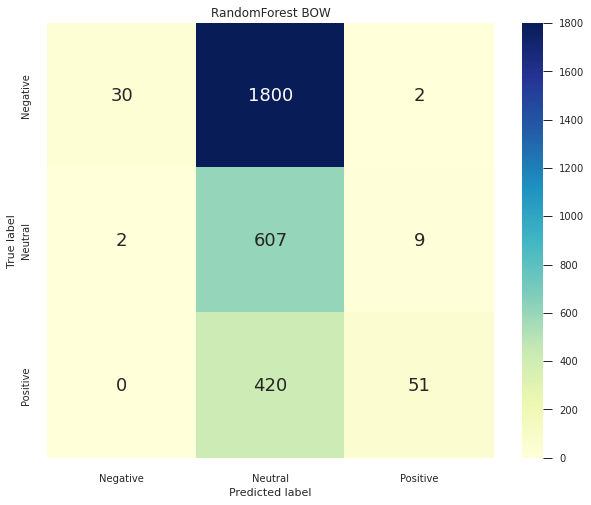

In [116]:
make_confusion_matrix(rf_bow_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest BOW",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

### Observation by Sanjib

1. Model could identify Positive and Neutral Sentiments with great accuracy.
2. Model could not identify Negative Sentiments accurately, rather mis classified as Neutral mostly.

In [117]:
df_scores = pd.concat([df_score_rf_randomCV, df_score_rf_bow_randomCV],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6975          0.6696         0.7901             
1     RandomForest BOW 0.6866          0.6645         0.7871             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7509          0.6975        0.6696       0.7179    0.6896    
1 0.7546          0.6866        0.6645       0.7073    0.6857

      Importance Feature    
1730 0.2393            thank
1171 0.0659              not
774  0.0420            great
1027 0.0336             love
471  0.0284            delay
831  0.0267             hold
849  0.0229            hours
798  0.0218            happy
269  0.0180           cancel
1888 0.0152             wait
201  0.0150             best
432  0.0132         customer
73   0.0131            amaze
771  0.0118             good
158  0.0113          awesome
271  0.0110           cannot
1964 0.0102            worst
264  0.0082             call
820  0.0076               hi
1968 0.0072            would
267  0.0066              can
1020 0.0064             lose
169  0.0058              bag
848  0.0050             hour
688  0.0050           flight
1547 0.0046          service
522  0.0043               dm
187  0.0043               be
1107 0.0042             miss
1147 0.0035             need
1776 0.0035         tomorrow
1175 0.0035          nothing
108  0.0032       appreciate
1312 0.0031   

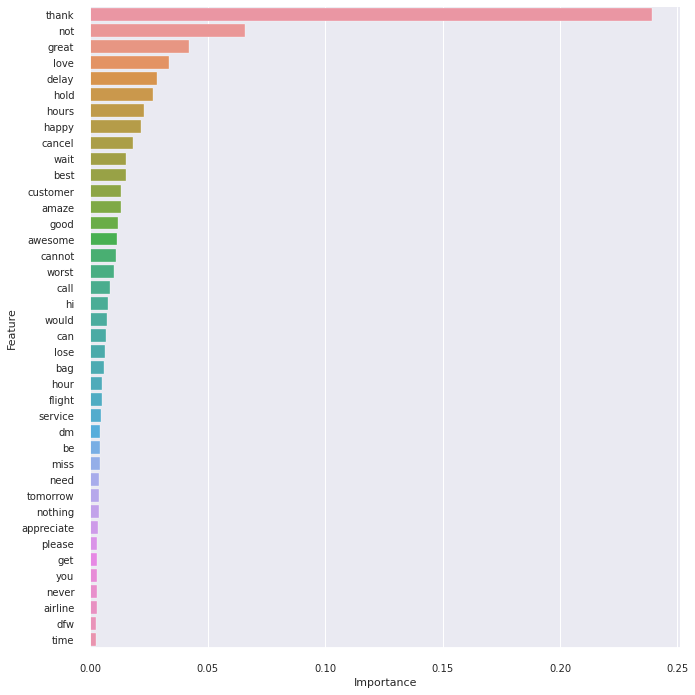

************************************************************


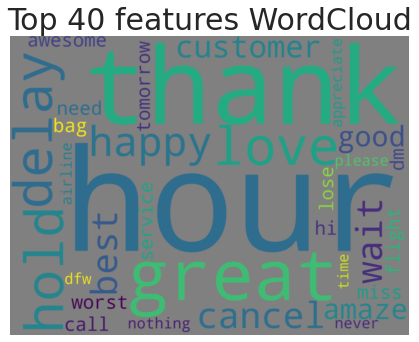

In [118]:
# display important word features that influenced model outcome

df_imp = feature_importance_in_tree(
    dTree=rf_bow_randomCV, 
    vectorizer=bow_vec,
    feature_names=X_train_bow.columns, 
    no_top_features = 40,
    model_name="RandomForest BOW"
)


In [119]:
df_imp # display

Importance Feature    
1730 0.2393            thank
1171 0.0659              not
774  0.0420            great
1027 0.0336             love
471  0.0284            delay
831  0.0267             hold
849  0.0229            hours
798  0.0218            happy
269  0.0180           cancel
1888 0.0152             wait
201  0.0150             best
432  0.0132         customer
73   0.0131            amaze
771  0.0118             good
158  0.0113          awesome
271  0.0110           cannot
1964 0.0102            worst
264  0.0082             call
820  0.0076               hi
1968 0.0072            would
267  0.0066              can
1020 0.0064             lose
169  0.0058              bag
848  0.0050             hour
688  0.0050           flight
1547 0.0046          service
522  0.0043               dm
187  0.0043               be
1107 0.0042             miss
1147 0.0035             need
1776 0.0035         tomorrow
1175 0.0035          nothing
108  0.0032       appreciate
1312 0.0031           please
759  0.0029              get
1989 0.0027              you
1149 0.0027            never
53   0.0026          airline
495  0.0026              dfw
1765 0.0025             time

# 7. Word2Vec Model

skip gram word vectorization.

The model taken into account sequence of words together, trying to understand the context of sentences.


## 7.1 Word2Vec Model

In [120]:
%%time
# tokenize
clean_tweet_tokenized = \
    df_clean_tweet["clean_text"].apply(
        lambda x : str(x).split() 
    )

clean_tweet_tokenized

CPU times: user 19.8 ms, sys: 2 ms, total: 21.8 ms
Wall time: 21.6 ms


In [121]:
print(len(df_clean_tweet["clean_text"]),df_clean_tweet.shape[0])

14604 14604


In [122]:
%%time
# size: The number of dimensions of the embeddings and the default is 100.
# window: The maximum distance between a target word and words around the target word. The default window is 5.
# min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
# workers: The number of partitions during training and the default workers is 3.
# sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.
# min_count: Ignores all words with total frequency lower than 2.  

model_w2v = Word2Vec(clean_tweet_tokenized, 
                 size= 200,
                 workers=2, # Google Colab
                 window =5, 
                 min_count=1, # Ignores all words with total frequency lower than 2.  
                 sg = 1)

model_w2v.train(clean_tweet_tokenized,
                total_examples = df_clean_tweet.shape[0],
                epochs=20)

CPU times: user 24 s, sys: 132 ms, total: 24.2 s
Wall time: 13.6 s


## 7.2 Quick and random Insights from model Word2Vec

In [123]:
model_w2v.wv.similarity('food','drink')

0.4769595

In [124]:
model_w2v.wv.similarity('obnoxious','bad')

0.3638837

In [125]:
model_w2v.wv.similarity('flight','airlines')

0.25905663

In [126]:
model_w2v.wv.similarity('ppl','people')

0.37431088

In [127]:
model_w2v.wv.similarity('hundred_points','happy')

0.2599988

In [128]:
model_w2v.most_similar("airlines")[:5]

[('american', 0.5421383380889893),
 ('turkish', 0.5181354284286499),
 ('greati', 0.516485333442688),
 ('yours', 0.5097324848175049),
 ('siberia', 0.5059844255447388)]

In [129]:
model_w2v.most_similar("happy")[:5]

[('nycgt', 0.48553621768951416),
 ('calledampit', 0.47085002064704895),
 ('dx', 0.47075188159942627),
 ('smite', 0.468912273645401),
 ('ghwish', 0.46296271681785583)]

In [130]:
model_w2v.most_similar("bad")[:5]

[('impair', 0.572827935218811),
 ('topdown', 0.547491192817688),
 ('senseless', 0.5402560234069824),
 ('hubs', 0.535524845123291),
 ('socialtantrum', 0.535382866859436)]

In [131]:
model_w2v.most_similar("thank")[:5]

[('condolences', 0.6349871158599854),
 ('thanx', 0.6319804191589355),
 ('greatly', 0.6295974254608154),
 ('flatter', 0.6097062826156616),
 ('blackhistorymonth', 0.6093791127204895)]

In [132]:
model_w2v.most_similar("delay")[:5]

[('todayall', 0.5887101292610168),
 ('thirty', 0.5878785252571106),
 ('shanghai', 0.5834892392158508),
 ('engagements', 0.5807738304138184),
 ('aircrft', 0.5800215005874634)]

## 7.3  Word2Vec Feature Enginerring



In [133]:

def word_vector(tokens, size):
    """
      Desc: 
        mean of all the word vectors present in the tweet
      Param:
        tokens : array of string
        size : int = max number of tokens, padding would be used
      Return:
        decimal = mean of all word vectors
    """
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [134]:
# Note : following transformation of mean vector is taking place within
# each record, not influenced by another record, no chance of data-leakage

wordvec_arrays = np.zeros((df_clean_tweet.shape[0],
                           200)) 

for i in range(df_clean_tweet.shape[0]):
    # each tweet (row)
    wordvec_arrays[i,:] = word_vector(
        clean_tweet_tokenized[i], 
        200)
wordvec_df = pd.DataFrame(wordvec_arrays,
                          index=df_clean_tweet.index,)
wordvec_df.shape

(14604, 200)

## 7.4 Word2Vec Data Split

In [135]:
%%time

# Split dataset into train and test

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    pd.DataFrame( wordvec_df, 
                 index=df_clean_tweet.index,
                 dtype="float16"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_w2v", X_train_w2v.shape)
print("X_test_w2v", X_test_w2v.shape)
print("y_train_w2v", y_train_w2v.shape)
print("y_test_w2v", y_test_w2v.shape)

X_train_w2v (11683, 200)
X_test_w2v (2921, 200)
y_train_w2v (11683,)
y_test_w2v (2921,)
CPU times: user 49.2 ms, sys: 2.01 ms, total: 51.3 ms
Wall time: 50.4 ms


In [136]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_w2v.value_counts(normalize=True))
print("="*40)
print(y_test_w2v.value_counts(normalize=True))
print("="*40)

0   0.6272
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64
0   0.6272
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64
0   0.6272
1   0.2116
2   0.1612
Name: airline_sentiment, dtype: float64


In [137]:
X_train_w2v.sample(10)

0       1       2      3       4      5       6       7       8       \
8132  -0.1836 -0.1807 0.1547 -0.0146 0.1130 -0.1102 -0.0749 -0.0625 -0.1101   
11559 -0.0563 -0.1249 0.2117  0.0116 0.1096 -0.2001 -0.0837  0.0976 -0.3899   
1606   0.0234 -0.1998 0.2585 -0.1326 0.3113 -0.1844 -0.0891  0.0672 -0.0975   
671   -0.2280 -0.1930 0.0567  0.0687 0.2173 -0.0976 -0.1294  0.0005  0.0185   
8131  -0.2568 -0.1819 0.0384  0.1415 0.1825  0.1209 -0.0303 -0.1937 -0.0495   
6616  -0.1516 -0.0537 0.2007  0.2167 0.2681 -0.0794 -0.1517 -0.1833 -0.1055   
13132 -0.2430 -0.2183 0.1394 -0.2019 0.5142  0.1979 -0.3914 -0.1161 -0.0662   
12509 -0.2527 -0.1694 0.2568  0.0612 0.3342 -0.1348 -0.1880 -0.2585 -0.2434   
531    0.0306  0.0103 0.0643  0.2207 0.2874  0.0116  0.1155  0.0296 -0.3042   
2432  -0.2808 -0.3264 0.1682  0.0512 0.2986 -0.1091 -0.1570 -0.1898 -0.0727   

       9       10      11      12      13      14      15      16      17      \
8132  -0.0944  0.1166  0.0076  0.0099 -0.0279 -0.2659 -0.1387  0.0161 -0.2632   
11559 -0.1915  0.0646  0.0673  0.1873 -0.1881 -0.1022 -0.1345  0.3027 -0.0463   
1606   0.0442  0.1906 -0.1213 -0.1165 -0.2334 -0.1383 -0.0337  0.2006  0.1196   
671   -0.4192 -0.1829 -0.1718 -0.0294 -0.0319 -0.1476 -0.0679  0.2257 -0.2183   
8131  -0.1820 -0.0580 -0.1798  0.1608 -0.3481 -0.0760  0.0001  0.2347 -0.1571   
6616  -0.1389 -0.1182 -0.0826  0.0399 -0.2998 -0.1661 -0.1236  0.1182 -0.1937   
13132 -0.3044 -0.0420 -0.2051  0.1740 -0.1949 -0.0286 -0.1801  0.1885 -0.0129   
12509 -0.2424 -0.1685 -0.0955 -0.0643 -0.2262 -0.2067 -0.0653 -0.0338 -0.2476   
531   -0.0613 -0.2238 -0.1183  0.0433 -0.1975 -0.0697  0.1326  0.1812 -0.2223   
2432  -0.2207 -0.1748 -0.1006 -0.0012 -0.1188 -0.1752 -0.1042  0.0156 -0.1015   

       18      19     20      21      22     23      24      25     26      \
8132  -0.0943 0.1005 -0.0318  0.0224 0.0908  0.0792 -0.1387 0.0280 -0.2458   
11559 -0.1152 0.1378  0.1383 -0.0404 0.1052  0.0459 -0.1598 0.1464 -0.2556   
1606  -0.2374 0.0474  0.0801 -0.1593 0.1372  0.1713  0.0735 0.1377 -0.4773   
671   -0.0519 0.1116 -0.0796 -0.1833 0.0686  0.0863  0.0103 0.0569 -0.3020   
8131  -0.2495 0.0969 -0.0094 -0.0931 0.0798 -0.0471 -0.0296 0.2382 -0.0377   
6616  -0.0929 0.0155 -0.0705  0.0218 0.0745 -0.0586  0.1048 0.1337 -0.2172   
13132 -0.3000 0.0001  0.3904 -0.1869 0.4089  0.2942 -0.2443 0.3303 -0.1514   
12509  0.0287 0.0276 -0.2399  0.0728 0.1455  0.0092  0.1802 0.3232 -0.0733   
531   -0.2059 0.1758 -0.1787 -0.1248 0.1179  0.1918 -0.1859 0.2462 -0.0771   
2432  -0.0618 0.1043 -0.1998 -0.0433 0.0623 -0.0294  0.1260 0.2563 -0.2539   

       27      28      29     30     31     32      33      34     35      \
8132  -0.1477  0.0566 0.2478 0.1520 0.3152  0.0577 -0.0376 0.1754 -0.1886   
11559 -0.2072  0.0074 0.3132 0.0009 0.3015  0.0975 -0.1615 0.1903 -0.1742   
1606  -0.3875 -0.0096 0.2642 0.0445 0.2444  0.2715 -0.1074 0.0581 -0.2184   
671   -0.0969  0.1603 0.1926 0.1222 0.2039 -0.0361 -0.0295 0.1049 -0.2932   
8131  -0.1100  0.1497 0.1410 0.0690 0.1913  0.1531  0.0630 0.1572 -0.1367   
6616  -0.0470  0.0393 0.3079 0.2198 0.2896  0.1566  0.1033 0.3306 -0.1989   
13132 -0.3101 -0.2915 0.1549 0.1542 0.0175  0.1627  0.1095 0.2268 -0.1879   
12509 -0.0738  0.1702 0.2190 0.1252 0.1989  0.0697  0.0829 0.3506 -0.1925   
531   -0.1105  0.0797 0.1731 0.1346 0.2505  0.1364  0.2316 0.2876 -0.3987   
2432  -0.1076  0.0538 0.0732 0.2820 0.2388  0.0332  0.1624 0.0592 -0.2688   

       36      37      38      39      40      41     42      43      44      \
8132   0.0889  0.0526  0.0043 -0.0027 -0.0367 0.3220  0.0975 -0.0981  0.0781   
11559  0.0173  0.0051  0.0362 -0.3616  0.0136 0.1377  0.0428 -0.0146  0.0186   
1606   0.2334  0.0497  0.1013 -0.1034  0.1575 0.0007 -0.0336  0.1415 -0.0309   
671    0.3132 -0.1877 -0.1021 -0.1935 -0.0178 0.3003  0.0265  0.0340 -0.2241   
8131   0.1724  0.0036  0.0432  0.0184 -0.0755 0.2245  0.1133  0.0446 -0.0562   
6616   0.2849 -0.0105 -0.0833 -0.0931  0.0250 0.2325  0.03

## 7.5 Random Forest Model with Word2Vec 

If time permits, XGBoost and other classification models could have been tried.

In [138]:
rf_w2v = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_w2v.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [139]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(5,15),
    "max_features": [ 0.6, 0.7, 0.8, 0.9],
    "max_samples": [ 0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 40, 60, 80],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_w2v.fit(X_train_w2v, y_train_w2v) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }


# would reduce overfitting
# scoring ={
#     "accuracy": make_scorer(accuracy_score),
#     "f1_weighted" : make_scorer(f1_score, average = "weighted") 
# }
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj_w2v = RandomizedSearchCV(
            estimator=rf_w2v, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="f1_weighted", 
            cv=5, 
            n_iter=10)

randomCV_obj_w2v = randomCV_obj_w2v.fit(
                    X_train_w2v, y_train_w2v)

# Set the clf to the best combination of parameters
rf_w2v_randomCV = randomCV_obj_w2v.best_estimator_

# Fit the best algorithm to the data.
rf_w2v_randomCV.fit(X_train_w2v, y_train_w2v)

CPU times: user 5min 26s, sys: 1.46 s, total: 5min 28s
Wall time: 15min 53s


In [140]:
rf_w2v_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [141]:
df_score_rf_w2v = get_metrics_score(
    rf_w2v_randomCV,
    X_train_w2v,
    X_test_w2v,  # unseen data
    y_train_w2v,
    y_test_w2v,  # unseen data
    desc="RandomForest Word2Vec",
    # roc=True,
)
df_score_rf_w2v

  Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9795          0.7703         0.9796             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7583          0.9795        0.7703       0.9794    0.7562    


Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9795          0.7703         0.9796             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7583          0.9795        0.7703       0.9794    0.7562

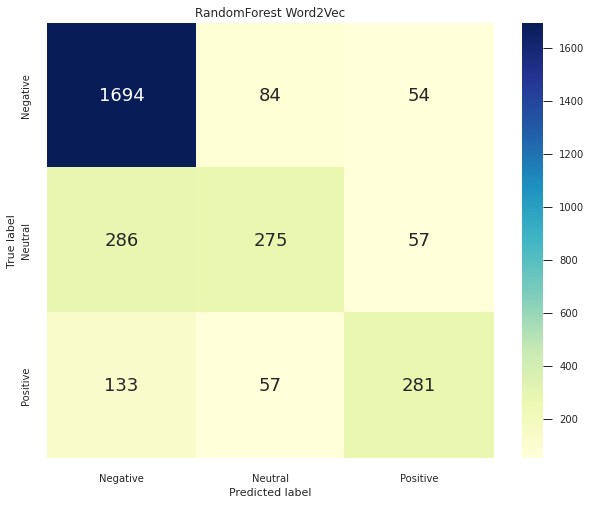

In [142]:
make_confusion_matrix(rf_w2v_randomCV, 
                      X_test=X_test_w2v,y_test=y_test_w2v,
                      desc="RandomForest Word2Vec",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [143]:
df_scores = pd.concat([df_scores, df_score_rf_w2v],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
2  RandomForest Word2Vec 0.9795          0.7703         0.9796             
0    RandomForest TF-IDF 0.6975          0.6696         0.7901             
1       RandomForest BOW 0.6866          0.6645         0.7871             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
2 0.7583          0.9795        0.7703       0.9794    0.7562    
0 0.7509          0.6975        0.6696       0.7179    0.6896    
1 0.7546          0.6866        0.6645       0.7073    0.6857

In [144]:
# The Word2vec used transformed vectorizer, 
# whose features does not map to individual words.
# Hence, feature importance wont tell the important words. 

# 8. LSTM Deep Learning Model

Bi directional LSTM (Recurrent Neural Network)

In [145]:
df_clean_tweet.sample(20) # check samples

Unnamed: 0  \
6627    6627        
1854    1854        
6658    6658        
8250    8250        
5873    5873        
6877    6877        
12254  12290        
1976    1976        
13379  13415        
7848    7848        
2707    2707        
5176    5176        
4008    4008        
11131  11131        
11936  11936        
12487  12523        
13832  13868        
4905    4905        
1949    1949        
1293    1293        

      text                                                                                                                                             \
6627                         @SouthwestAir the person I talked to couldn't do anything not normally available online other than the "no charge" part.   
1854                                                                                                   @united this 2 hr delay is a vacation buzzkill   
6658                        @SouthwestAir Finally! Integration w/ passbook is a great Valentine gift - better then chocoLate Flight. You do heart me.   
8250                                        @JetBlue oh yes! I hope you expand to other airports soon so I can fly you to see my family each year!!!!   
5873        @SouthwestAir me &amp; @sammi_jon3s are best friends because of @Imaginedragons. Any chance we could get tickets to #DestinationDragons ?   
6877                                                                                       @JetBlue try harder. Take a winners attitude to your work.   
12254             @AmericanAir Not here yet, but I plan on it. If you could have them fly low and slow right in front of me, that would be great. ;-)   
1976                 @united Good luck with the no-enertainment-on-6-hour-flights strategy. Innovation at work. Hello @jetblue http://t.co/HI76BOavXY   
13379                                                                         @AmericanAir - trying to track down backs for two of my attendees #help   
7848                                                                @JetBlue thanks. I chatted with a nice fella about it and he gave me the lowdown.   
2707                                                                   @united it's done.  If you do something to make up for it I'll tweet that too.   
5176            @SouthwestAir Gate attendant at McCarran C16 (Vegas to Dallas) went above and beyond. After a long day of frustration it was welcome.   
4008                                                                                                            @united 618 was flight out of Houston   
11131            @USAirways @AmericanAir Will you be destroying lives in Eastern @GastonCounty during this lively little event? For profits you will.   
11936                                                                                           @AmericanAir @pbpinftworth iPhone 6 64GB (not 6 plus)   
12487  @AmericanAir after losing my bags for 4 days&amp;charging me $475 to"arrange pick up"in argentina,claiming tollfree: won't reimburse me. Help!   
13832                                                                                  @AmericanAir you have let me down. Seriously. #unhappycustomer   
4905                                                                                                                        @SouthwestAir sign me up!   
1949                  Very quick! TY. @united: @auciello I am sorry to hear this. Can you please follow and DM me the details of what transpired? ^JH   
1293                  @united funny I paid to check my bag and now flight 1086 is BEGGING folks to check bags for free 1 hour before flight. #notcool   

      airline_sentiment  \
6627   negative           
1854   negative           
6658   positive           
8250   positive           
5873   positive           
6877    neutral           
12254   neutral           
1976   negative           
13379   neutral           
7848   positive           
2707    neutral           
5176   positive           


## 8.1 Data Split into Train, Validation, Test

Data-split is carried early to avoid data-leakage.

Train :: Validation :: Test = 70 :: 15 :: 15

In [146]:


%%time

# Split dataset into train and test

X_train_lstm, X_test_lstm, \
y_train_lstm, y_test_lstm = train_test_split(
    pd.DataFrame( df_clean_tweet["clean_text"].values.astype('U'), 
                 index=df_clean_tweet.index,
                 ), 
    df_clean_tweet["airline_sentiment"], 
    test_size=0.30, 
    random_state=10,
    stratify=df_clean_tweet["airline_sentiment"])


print("X_train_lstm", X_train_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_train_lstm", y_train_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)


X_train_lstm (10222, 1)
X_test_lstm (4382, 1)
y_train_lstm (10222,)
y_test_lstm (4382,)
CPU times: user 37.7 ms, sys: 0 ns, total: 37.7 ms
Wall time: 35.3 ms


In [147]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6272
neutral    0.2117
positive   0.1612
Name: airline_sentiment, dtype: float64
negative   0.6272
neutral    0.2116
positive   0.1612
Name: airline_sentiment, dtype: float64
negative   0.6271
neutral    0.2118
positive   0.1611
Name: airline_sentiment, dtype: float64


In [148]:
X_train_lstm.sample(10)

0                                                                                        
12877                                    instead yell tell call number not pick due call volume
5625                                                                               i follow now
8570                                                              true new a livery new website
2096            not hour delay double book seat nit park wrong gate incompetence finest wait hr
11681                    i hold mins waste time amp i not appreciate wheresthecustomerserviceat
2690   never fail fly fc order ravioli get chicken tell fa say tell me people want chickenidiot
9753                       airport dca airline mess flight also not cover hotel cost at dca hrs
10363                 hotel voucher everyone get one not mewhat i do arrive amsterdam snowstorm
3406                                              unfortunately not help just automate computer
13513           way ruin vacation brother call night multiple place line get dead air call back

In [149]:
y_test_lstm.sample(10)

13228    negative
2087     negative
7498     negative
14468    negative
11504    negative
10027     neutral
13043    negative
16       positive
2566     negative
12952    negative
Name: airline_sentiment, dtype: object

In [150]:
%%time

# Split test dataset into validation and test

X_val_lstm, X_test_lstm, \
y_val_lstm, y_test_lstm = train_test_split(
    X_test_lstm, 
    y_test_lstm, 
    test_size=0.50, 
    random_state=10,
    stratify=y_test_lstm)


print("X_val_lstm", X_val_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_val_lstm", y_val_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)

X_val_lstm (2191, 1)
X_test_lstm (2191, 1)
y_val_lstm (2191,)
y_test_lstm (2191,)
CPU times: user 6.68 ms, sys: 0 ns, total: 6.68 ms
Wall time: 6.55 ms


In [151]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_val_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6272
neutral    0.2117
positive   0.1612
Name: airline_sentiment, dtype: float64
negative   0.6272
neutral    0.2116
positive   0.1612
Name: airline_sentiment, dtype: float64
negative   0.6271
neutral    0.2118
positive   0.1611
Name: airline_sentiment, dtype: float64
negative   0.6271
neutral    0.2118
positive   0.1611
Name: airline_sentiment, dtype: float64


In [152]:
X_val_lstm.sample(10) # checking

0                                                                                        
4461       best airline hand down amaze customer service bag free affordable flight happycamper
5163                    cannot fly precipitation plan not work rd airline better charm tomorrow
8365     cancel flightling ticket best friends go vacation never tell us jetblue fixthis ripoff
2306                                      i glad solve prob but experience remain not fly unite
13630                  add insult injury guy misplace bag cannot believe pay money treat poorly
58                                                                                       carrie
8518                                                         big board say not leave weary_face
6858                     want customs long beach airport future international flight by c happy
4059                                    on top this csr go ahead hang i call unite discuss this
1102   unite gold number i hold minutes think i may lose nowhereland have gold reservation help

In [153]:
y_val_lstm.sample(10) # checking

4040      neutral
5923      neutral
11684    negative
7510     negative
3133     positive
8041     positive
12596    positive
4474     negative
3778     negative
13864    negative
Name: airline_sentiment, dtype: object

## 8.2 Tokenization - Data Preprocessing

In [154]:
tokenizer = Tokenizer(num_words = 5000, #vocab_size, input_dim
                      oov_token="<OOV>")

tokenizer.fit_on_texts(X_train_lstm[0])
tokenizer.word_index


{'<OOV>': 1,
 'i': 2,
 'flight': 3,
 'not': 4,
 'get': 5,
 'thank': 6,
 'cancel': 7,
 'service': 8,
 'delay': 9,
 'time': 10,
 'help': 11,
 'you': 12,
 'go': 13,
 'fly': 14,
 'us': 15,
 'call': 16,
 'customer': 17,
 'would': 18,
 'wait': 19,
 'bag': 20,
 'hold': 21,
 'make': 22,
 'need': 23,
 'be': 24,
 'hours': 25,
 'amp': 26,
 'cannot': 27,
 'try': 28,
 'plane': 29,
 'one': 30,
 'still': 31,
 'gate': 32,
 'please': 33,
 'book': 34,
 'say': 35,
 'back': 36,
 'tell': 37,
 'flightled': 38,
 'seat': 39,
 'take': 40,
 'hour': 41,
 'change': 42,
 'do': 43,
 'face': 44,
 'it': 45,
 'phone': 46,
 'check': 47,
 'late': 48,
 'know': 49,
 'like': 50,
 'today': 51,
 'guy': 52,
 'no': 53,
 'work': 54,
 'now': 55,
 'airline': 56,
 'miss': 57,
 'ticket': 58,
 'give': 59,
 'leave': 60,
 'me': 61,
 'send': 62,
 'could': 63,
 'day': 64,
 'board': 65,
 'way': 66,
 'want': 67,
 'travel': 68,
 'airport': 69,
 'hrs': 70,
 'happy': 71,
 'great': 72,
 'really': 73,
 'sit': 74,
 'tomorrow': 75,
 'love': 76,


In [155]:
# tokenize sequence, for seq2seq model

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_lstm[0])

print(train_sequences[10]), len(train_sequences[10])

[2, 211, 135, 2, 4, 81, 197, 21, 35, 28, 48, 148, 2357]


(None, 13)

In [156]:
print(train_sequences[0]), len(train_sequences[0])

[6]


(None, 1)

In [157]:
# checking
print(train_sequences[100]), len(train_sequences[100])

[541, 882, 50, 1633, 36, 210, 41, 48, 3, 164, 6, 1476, 72, 8, 51]


(None, 15)

Data distrubution of sequence length


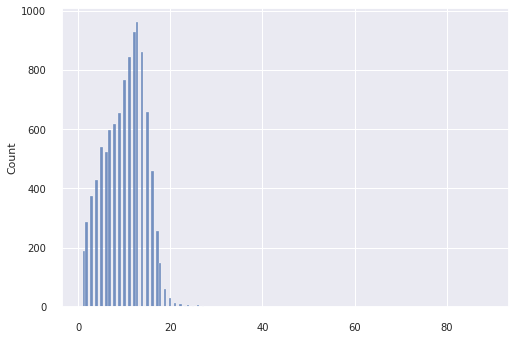

In [158]:
len_train_seq = [ len(i) for i in train_sequences]

print("Data distrubution of sequence length")

sns.histplot(data =len_train_seq);

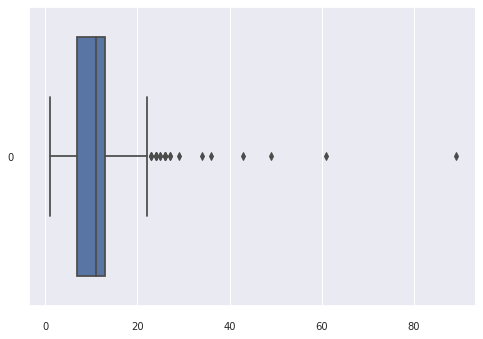

In [159]:
sns.boxplot(data =len_train_seq, orient="h");

### Observation by Sanjib:

1. Most of the lengths of sequences are under 20. 

In [160]:
"""
  IMPORTANT NOTE: 
    We observed that tweets generally have the sentiment 
    expressed towards end of tweet, as conclusion. Hence
    words towards end of tweet are important in sentiment
    classification. 
    We'll go for "pre" padding, and "pre" truncating. 
"""

train_padded = pad_sequences(
    train_sequences, 
    maxlen=20,            # maximum length of all sequences. 
    padding="pre", 
    truncating="pre")

In [161]:
train_padded[10] # length of sequence was 12

array([   0,    0,    0,    0,    0,    0,    0,    2,  211,  135,    2,
          4,   81,  197,   21,   35,   28,   48,  148, 2357], dtype=int32)

In [162]:
# testing a few more samples of padding, 
# comparing with original length of sequence

[ print(
  "length of train_sequence[{}], train_paddded[{}]= {} ".format(
  i,i,train_padded[i]))  for i in [0,10, 100, 200, 500, 1000, 1500]] 

length of train_sequence[0], train_paddded[0]= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6] 
length of train_sequence[10], train_paddded[10]= [   0    0    0    0    0    0    0    2  211  135    2    4   81  197
   21   35   28   48  148 2357] 
length of train_sequence[100], train_paddded[100]= [   0    0    0    0    0  541  882   50 1633   36  210   41   48    3
  164    6 1476   72    8   51] 
length of train_sequence[200], train_paddded[200]= [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 294 150] 
length of train_sequence[500], train_paddded[500]= [  0   0   0   0   0   0 350 630   9   3 534   2   5  88 449 362 330   9
  10 350] 
length of train_sequence[1000], train_paddded[1000]= [   0    0    0    0    0    0    0    0    0    0   16   83 1044 1091
  544   11    2  397  301 2373] 
length of train_sequence[1500], train_paddded[1500]= [   0    0    0    0    0  275    4   16   36    8 1069  610  359   37
   15   16   36   48  148  752] 


[None, None, None, None, None, None, None]

In [163]:


# apply same transformation on the 
# validation and test data set

#### Validation Data
val_sequences = tokenizer.texts_to_sequences(X_val_lstm[0])
val_padded = pad_sequences(val_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Val Sequence", len(val_sequences))
print("Val Padded", val_padded.shape)

#### Validation Data
test_sequences = tokenizer.texts_to_sequences(X_test_lstm[0])
test_padded = pad_sequences(test_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Test Sequence", len(test_sequences))
print("Test Padded", test_padded.shape)

Val Sequence 2191
Val Padded (2191, 20)
Test Sequence 2191
Test Padded (2191, 20)


In [164]:
# label data encoding starts
y_train_lstm.sample(10)

2556     positive
2245     negative
5662     negative
5099     positive
3711      neutral
5408     negative
12407    negative
13459    positive
10440    negative
4727     negative
Name: airline_sentiment, dtype: object

In [165]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df_clean_tweet["airline_sentiment"])

training_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_train_lstm))

val_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_val_lstm))

test_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_test_lstm))

label_tokenizer.word_index

{'negative': 1, 'neutral': 2, 'positive': 3}

In [166]:
# testing a few samples

[ print("training_label_seq[{}]={} ; val_label_seq[{}]={}; testing_label_seq[{}]={}".format(
    i,training_label_seq[i],
    i,val_label_seq[i],
    i,test_label_seq[i])) for i in np.arange(5)]

training_label_seq[0]=[2] ; val_label_seq[0]=[1]; testing_label_seq[0]=[2]
training_label_seq[1]=[1] ; val_label_seq[1]=[1]; testing_label_seq[1]=[2]
training_label_seq[2]=[2] ; val_label_seq[2]=[2]; testing_label_seq[2]=[1]
training_label_seq[3]=[1] ; val_label_seq[3]=[1]; testing_label_seq[3]=[2]
training_label_seq[4]=[3] ; val_label_seq[4]=[1]; testing_label_seq[4]=[1]


[None, None, None, None, None]

In [167]:
print(training_label_seq.shape, 
      val_label_seq.shape,
      test_label_seq.shape)

(10222, 1) (2191, 1) (2191, 1)


## 8.3 Build Sequential Model

In [168]:
#Instantiating the Sequential model
model_LSTM = Sequential()                                                                            
#Initializing the embedding layer
model_LSTM.add(Embedding(input_dim=5000,
                    output_dim=64,
                    # 5000, # vocab_size=
                    # 64, embedding_dim=
                    # rnn_units = 64,
                    # BATCH_SIZE=100,
                    input_length=20,
                    # input_dim=10,
                    # output_dim=10               
                    ))  
#Initializing the dropout layer to avoid the overfitting                                               
model_LSTM.add(Dropout(0.5))  
# Initialization of Bi-directional LSTM Layer                                                                       
model_LSTM.add(Bidirectional(LSTM(64)))  # rnn_units
# softmax converts a vector of values to a probability distribution.                                                 
model_LSTM.add(Dense(4, activation='softmax'))                                                     

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            320000    
                                                                 
 dropout (Dropout)           (None, 20, 64)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 386,564
Trainable params: 386,564
Non-trainable params: 0
_________________________________________________________________


**Embedding Layer**
- Word embeddings allow the value of the vector’s element to be trained. After training, words with similar meanings often have similar vectors.

**Dropout Layer**
- Adding the dropout layer to combat overfitting.

**Bidirectional LSTM Layer**
- The Bidirectional layer propagates the input forward and backwards through the LSTM layer and then concatenates the output. This helps the LSTM to learn long range dependencies.

**Dense Layer**
- This the final layer, the Dense layer with softmax activation for the multi-class classification.

In [169]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002,
                              beta_1=0.09,
                              beta_2=0.999,
                              epsilon=1e-07,
                              amsgrad=False,            
                              decay=1e-6)

#crossentropy loss function when there are two or more label classes.

model_LSTM.compile(
    # loss='categorical_crossentropy',  
    loss='sparse_categorical_crossentropy',      
    optimizer=opt,
    metrics=['accuracy'],
)

In [170]:
%%time

# Model hyper parameter tunning 
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01,
                   mode='max', verbose=1, patience=20,
                   restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', 
                     mode='max', verbose=1, save_best_only=True)


history = model_LSTM.fit(train_padded, 
              training_label_seq, 
              epochs=100, 
              validation_data=(val_padded, val_label_seq), 
              verbose=2,
              batch_size=24,
              callbacks=[es, mc],
              use_multiprocessing=True) 

Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.62711, saving model to best_model.h5
426/426 - 9s - loss: 1.2927 - accuracy: 0.5608 - val_loss: 1.1055 - val_accuracy: 0.6271 - 9s/epoch - 21ms/step
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.62711
426/426 - 2s - loss: 0.9958 - accuracy: 0.6272 - val_loss: 0.9321 - val_accuracy: 0.6271 - 2s/epoch - 5ms/step
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.62711
426/426 - 2s - loss: 0.9122 - accuracy: 0.6272 - val_loss: 0.8976 - val_accuracy: 0.6271 - 2s/epoch - 5ms/step
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.62711
426/426 - 2s - loss: 0.8749 - accuracy: 0.6272 - val_loss: 0.8587 - val_accuracy: 0.6271 - 2s/epoch - 5ms/step
Epoch 5/100

Epoch 00005: val_accuracy improved from 0.62711 to 0.62939, saving model to best_model.h5
426/426 - 2s - loss: 0.8319 - accuracy: 0.6288 - val_loss: 0.8270 - val_accuracy: 0.6294 - 2s/epoch - 5ms/step
Epoch 6/100

Epoch 00006: val_accurac

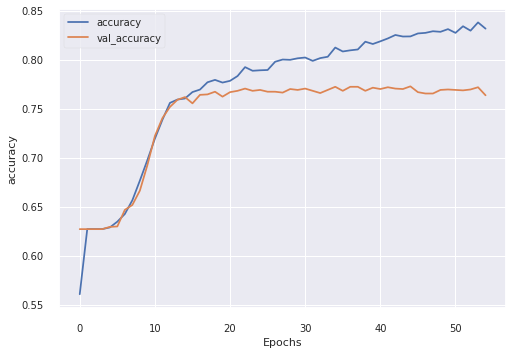

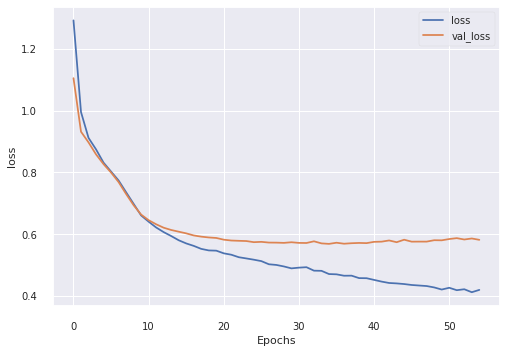

CPU times: user 452 ms, sys: 12.9 ms, total: 465 ms
Wall time: 455 ms


In [171]:

%%time
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Note: The shape of above two graphs are decent 

## 8.4 Performance of LSTM Model

In [172]:


# Test data set is unseen for model LSTM
score = model_LSTM.evaluate(test_padded, test_label_seq)

69/69 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7672


In [173]:
print(score, score[1]) 

[0.5604476928710938, 0.7672295570373535] 0.7672295570373535


In [174]:
# training accuracy
accuracy_train = history.history.get("accuracy")[-1]
accuracy_train


0.8315398097038269

In [175]:
# validation accuracy
accuracy_val = history.history.get("val_accuracy")[-1]
accuracy_val

0.7635782957077026

In [176]:
%%time 

# re usable funtion to measure various performance KPI

def make_confusion_matrix_LSTM(model, 
            test_padded, test_label_seq, y_test,
            history, desc="", CATEGORIES=[]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # y_test_pred_ln = model.predict(X_test)
  # y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)

  # training accuracy
  accuracy_train = history.history.get("accuracy")[-1]
  accuracy_train
  print("ACCURACY TRAIN =", accuracy_train) 

  # validation accuracy
  accuracy_val = history.history.get("val_accuracy")[-1]
  accuracy_val
  print("ACCURACY VALIDATION =", accuracy_val) 

  # Test accuracy
  score = model.evaluate(test_padded, test_label_seq)
  accuracy_test = score[1]
  print("ACCURACY TEST =", accuracy_val) 

  # accuracy_test =  accuracy_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln) 
  # print("ACCURACY TEST =", accuracy_test) 


  y_test_pred = model.predict(test_padded)

  # Encode classes into numbers
  y_test_int = y_test.replace({"negative": 1, 
                "neutral": 2, 
                "positive": 3}).astype("uint8")  

  # Test recall
  recall_test =  recall_score(   
      y_test_int,
      np.argmax(y_test_pred, axis=1), 
      average="weighted") 
  print("RECALL TEST =", recall_test) 

  # *********************************************************
  # NOTE : Because Average is chosen as "weighted", 
  # Accuracy-Test == Recall-Test
  # *********************************************************

  # Test precision
  precision_test =  precision_score( 
      y_test_int,  
      np.argmax(y_test_pred, axis=1), 
      average="weighted") 
  print("PRECISION TEST =", precision_test) 

  # Test F1-Score
  f1_test = f1_score(     
      y_test_int,
      np.argmax(y_test_pred, axis=1), 
      average='weighted')
  print("F1 TEST =", f1_test) 


  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
              # np.argmax(y_test, axis=1), 
              y_test_int,
              np.argmax(y_test_pred,axis=1)
            )

  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, 
              xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, 
              cmap="YlGnBu", fmt="",
              annot=True)
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  # sns.set_context("notebook")  # talk : bolds the plots

  desc = desc + " Accuracy-Val={:,.4f}".format(accuracy_val)

  return pd.DataFrame( {"Description": desc, 
                        "Accuracy-Train": accuracy_train,
                        # "Accuracy-Validation": accuracy_val,
                        "Accuracy-Test": accuracy_test,
                        "Precision-Train": np.nan,
                        "Precision-Test" : precision_test,
                        "Recall-Train": np.nan,
                        "Recall-Test": recall_test,
                        "F1-Train": np.nan,
                        "F1-Test": f1_test,
                        },
                      index=[0] )



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


ACCURACY TRAIN = 0.8315398097038269
ACCURACY VALIDATION = 0.7635782957077026
69/69 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7672
ACCURACY TEST = 0.7635782957077026
RECALL TEST = 0.7672295755362848
PRECISION TEST = 0.7636631121226437
F1 TEST = 0.7650307308982206


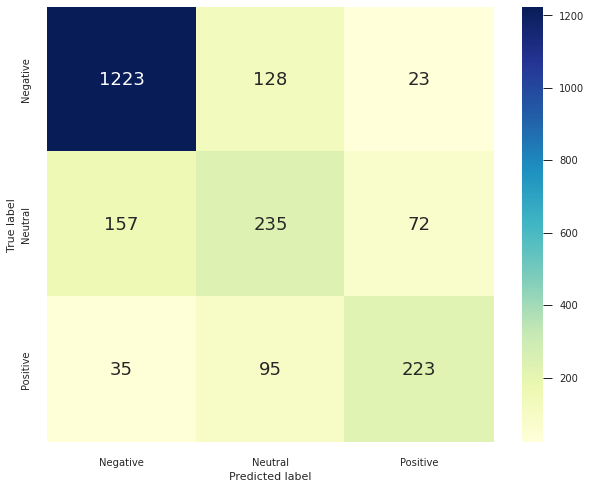

In [177]:
# save the results in a dataframe
df_score_lstm = make_confusion_matrix_LSTM(
                    model=model_LSTM, 
                    test_padded=test_padded, 
                    test_label_seq=test_label_seq, 
                    y_test=y_test_lstm, 
                    history=history,
                    desc="Bi-LSTM", 
                    CATEGORIES=["Negative", "Neutral", "Positive"]) 

### Observation by Sanjib :

1. Above Confusion Marix: Balanced classification accross various types of sentiments (target values)

2. Below Performace Scores: Low overfitting.

In [178]:
df_score_lstm

Description                   Accuracy-Train  Accuracy-Test  \
0  Bi-LSTM Accuracy-Val=0.7636 0.8315          0.7672           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0 nan              0.7637          nan           0.7672       nan         

   F1-Test  
0 0.7650

In [179]:
df_scores = pd.concat([df_scores, df_score_lstm],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test"], ascending=False)

Description                   Accuracy-Train  Accuracy-Test  \
2        RandomForest Word2Vec 0.9795          0.7703           
3  Bi-LSTM Accuracy-Val=0.7636 0.8315          0.7672           
0          RandomForest TF-IDF 0.6975          0.6696           
1             RandomForest BOW 0.6866          0.6645           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
2 0.9796           0.7583          0.9795        0.7703       0.9794      
3    nan           0.7637             nan        0.7672          nan      
0 0.7901           0.7509          0.6975        0.6696       0.7179      
1 0.7871           0.7546          0.6866        0.6645       0.7073      

   F1-Test  
2 0.7562    
3 0.7650    
0 0.6896    
1 0.6857

In [180]:
%%time

model_LSTM.save(("/content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl/assets


CPU times: user 11.1 s, sys: 438 ms, total: 11.5 s
Wall time: 14.4 s


# 9. Pre trained BERT model

Transfer learning on Pre-Trained Transformer model.

In [181]:
import pyarrow as pa
import pyarrow.dataset as ds

from datasets import load_dataset, Dataset

In [182]:

# Pretrained model

from transformers import TFAutoModelForSequenceClassification

# model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

## 9.1 Feature engineer for BERT model


In [183]:
# data sample
X_train_lstm

0                                                                                                              
11576                                                                                                           thank
7876   thank include us tour do pack winter coatunfortunately yes snowflake snowman_without_snow werenotincalianymore
9221                                             expedia reserve ticket usaw flight issue they not responsivethoughts
10531                                                             what you cancel flightled flight again be pay hotel
11919                 i not think help base behavior the voucher cot seem like enough lol grinning_face_with_big_eyes
...                                                                                                               ...
9072                                     i glad retweeted otherwise would ignore numerous tweet i send you fuck amaze
3232                               worseoh cannot delay reason way lonflight cancel flight no reason less days return
3258                   make sure make cancel flight flight baggage upgrade fee seem like labyrinth might able swindle
10705                                               think worst airline nah you guy far worse be decent airline there
14443                                                         cannot get thru phone use credit expire frustrate aacom

[10222 rows x 1 columns]

In [184]:
X_train_lstm[0]

11576                                                                                                             thank
7876     thank include us tour do pack winter coatunfortunately yes snowflake snowman_without_snow werenotincalianymore
9221                                               expedia reserve ticket usaw flight issue they not responsivethoughts
10531                                                               what you cancel flightled flight again be pay hotel
11919                   i not think help base behavior the voucher cot seem like enough lol grinning_face_with_big_eyes
                                                              ...                                                      
9072                                       i glad retweeted otherwise would ignore numerous tweet i send you fuck amaze
3232                                 worseoh cannot delay reason way lonflight cancel flight no reason less days return
3258                     make sure make 

In [185]:

X_train_list = list(X_train_lstm[0]) 
X_train_list

['thank',
 'thank include us tour do pack winter coatunfortunately yes snowflake snowman_without_snow werenotincalianymore',
 'expedia reserve ticket usaw flight issue they not responsivethoughts',
 'what you cancel flightled flight again be pay hotel',
 'i not think help base behavior the voucher cot seem like enough lol grinning_face_with_big_eyes',
 'pilot time outgetmeoutofhere',
 'be issue mobile board pass my app keep crash i try access thank',
 'sure miss mark tonights redeye lax chicago what mess you better',
 'cannot wait i one cannot contain herself grinning_face_with_smiling_eyes',
 'i ask exception staffer move last minutewe nonprofit amp lose we want change ticket',
 'i understand that i not even put hold say try late flightr goodbye',
 'promise room wednesday wentook hotel charge us per room pink paper need white',
 'travel book thru unite group dept okc ticket agent less will help connection lax',
 'at email adress i send ceo mr doug parker letter hopefully read',
 'i fl

In [186]:

from transformers import AutoTokenizer

# Choose base BERT model, TwitterBERT was not available free
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [187]:

def tokenize_function(examples):
    return tokenizer(examples,  
                      padding="max_length", 
                      truncation=True)

In [188]:


#unit test
tokenize_function(
    ["min hang up always awful call reservations there", 
     "a test string"])

{'input_ids': [[101, 11241, 7311, 1146, 1579, 9684, 1840, 20624, 1175, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [189]:
%%time

#tokenize training dataset
dataset_train = Dataset.from_dict(
    tokenize_function( X_train_list ) )

CPU times: user 2.45 s, sys: 365 ms, total: 2.82 s
Wall time: 2.18 s


In [190]:
dataset_train

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 10222
})

In [191]:
print(dataset_train[10]) # checking

{'input_ids': [101, 178, 2437, 1115, 178, 1136, 1256, 1508, 2080, 1474, 2222, 1523, 3043, 1197, 12903, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [192]:
%%time 
# tokenzing validation dataset
dataset_val = Dataset.from_dict(
    tokenize_function( list(X_val_lstm[0]) ) )

CPU times: user 414 ms, sys: 16.7 ms, total: 430 ms
Wall time: 318 ms


In [193]:
print(dataset_val)

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2191
})


In [194]:
%%time 
# tokenize test dataset
dataset_test = Dataset.from_dict(
    tokenize_function( list(X_test_lstm[0]) ) )

CPU times: user 410 ms, sys: 13.8 ms, total: 424 ms
Wall time: 309 ms


In [195]:
dataset_test


Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2191
})

In [196]:
y_train_lstm # target valiable

11576     neutral
7876     negative
9221      neutral
10531    negative
11919    positive
           ...   
9072     positive
3232     negative
3258     negative
10705    negative
14443    negative
Name: airline_sentiment, Length: 10222, dtype: object

In [197]:
# encode target variable
y_train_bert = \
tf.keras.utils.to_categorical(
                    
                    y_train_lstm.replace(
                              {"negative": 0, 
                              "neutral": 1, 
                              "positive": 2}
                          ).astype("uint8"),
                    num_classes=3)

In [198]:
y_train_bert

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [199]:
# features 

[k  for k in dataset_train.features] 

['input_ids', 'token_type_ids', 'attention_mask']

In [200]:
# Following Code was applicable to earlier version of Keras and Transformers

# print(dataset_train_array)

In [201]:
# np.array(dataset_train['input_ids'])

In [202]:
# tr_reviews, tr_segments, tr_masks = np.split(
#     np.array(dataset_train.to_pandas()), 3, axis=1)


In [203]:
# val_reviews, val_segments, val_masks = np.split(
#     np.array(dataset_val.to_pandas()), 3, axis=1)
# test_reviews, test_segments, test_masks = np.split(
#     np.array(dataset_test.to_pandas()), 3, axis=1)

In [204]:
# tr_reviews = tr_reviews.squeeze()
# tr_segments = tr_segments.squeeze()
# tr_masks = tr_masks.squeeze()

# val_reviews = val_reviews.squeeze()
# val_segments = val_segments.squeeze()
# val_masks = val_masks.squeeze()

In [205]:
# def example_to_features(input_ids,attention_masks,token_type_ids,y):
#   return {"input_ids": input_ids,
#           "attention_mask": attention_masks,
#           "token_type_ids": token_type_ids},y


# train_ds = tf.data.Dataset.from_tensor_slices((tr_reviews, tr_masks, 
#                                                tr_segments, y_train_bert)).\
#             map(example_to_features).shuffle(100).batch(16)

# valid_ds = tf.data.Dataset.from_tensor_slices((val_reviews, val_masks, 
#                                                val_segments, y_val)).\
#             map(example_to_features).shuffle(100).batch(16)

In [206]:
# Encode classes into numbers, trainning dataset
y_train_bert = y_train_lstm.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y_train_bert

11576    1
7876     0
9221     1
10531    0
11919    2
        ..
9072     2
3232     0
3258     0
10705    0
14443    0
Name: airline_sentiment, Length: 10222, dtype: uint8

In [207]:
# Encode classes into numbers, validation dataset
y_val_bert = y_val_lstm.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y_val_bert

5975     0
4059     0
510      1
8887     0
13018    0
        ..
4050     2
14362    0
5534     1
5072     0
11115    1
Name: airline_sentiment, Length: 2191, dtype: uint8

In [208]:
# Encode classes into numbers, test dataset
y_test_bert = y_test_lstm.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y_test_bert

8428     1
11797    1
3854     0
9501     1
8753     0
        ..
9557     0
8718     1
12748    2
2314     1
5229     0
Name: airline_sentiment, Length: 2191, dtype: uint8

In [209]:
# Add target feature, trainning dataset

dataset_train = dataset_train.add_column( name="label",
                          column=y_train_bert ,)
dataset_train

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
    num_rows: 10222
})

In [210]:
# checking
dataset_train["label"]


[1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,


In [211]:
# Add target feature, after encoding, validation dataset

dataset_val = dataset_val.add_column( name="label",
                          column=y_val_lstm.replace(
                              {"negative": 0, 
                              "neutral": 1, 
                              "positive": 2}
                          ))
dataset_val

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
    num_rows: 2191
})

In [212]:
# Add target feature, after encoding, test dataset

dataset_test = dataset_test.add_column( name="label",
                          column=y_test_lstm.replace(
                              {"negative": 0, 
                              "neutral": 1, 
                              "positive": 2}
                          ))
dataset_test

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
    num_rows: 2191
})

In [213]:
type(dataset_train['input_ids'])

list

In [214]:
%%time
# Prepare X, y features into complete dataset, training
train_features = {x: dataset_train[x] for x in dataset_train.features}
train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_features, 
                                                y_train_bert))


train_tf_dataset = train_tf_dataset.shuffle(
    y_train_bert.shape[0]).batch(8)


CPU times: user 39.6 s, sys: 130 ms, total: 39.7 s
Wall time: 39.6 s


In [215]:
%%time
# Prepare X, y features into complete dataset, validation
eval_features = {x: dataset_val[x] for x in dataset_val.features}
eval_tf_dataset = tf.data.Dataset.from_tensor_slices((eval_features, 
                                                      y_val_bert))
eval_tf_dataset = eval_tf_dataset.batch(8)

CPU times: user 8.6 s, sys: 8.86 ms, total: 8.61 s
Wall time: 8.58 s


In [216]:
%%time
# Prepare X, y features into complete dataset, test
test_features = {x: dataset_test[x] for x in dataset_test.features}
test_tf_dataset = tf.data.Dataset.from_tensor_slices((test_features, 
                                                      y_test_bert))
test_tf_dataset = test_tf_dataset.batch(8)

CPU times: user 8.51 s, sys: 17.7 ms, total: 8.52 s
Wall time: 8.49 s


## 9.2 Build BERT model


In [217]:
bert_name="bert-base-cased"

# Warnings can be ignored safely
bert_model = TFAutoModelForSequenceClassification.from_pretrained(bert_name, 
                                                     num_labels=3)

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [218]:
%%time
# build BERT model
bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5,
                              beta_1=0.09,
                              beta_2=0.999,
                              epsilon=1e-07,
                              amsgrad=False,            
                              decay=1e-6),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)



CPU times: user 10 ms, sys: 44 µs, total: 10.1 ms
Wall time: 9.4 ms


In [219]:

bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_38 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 108,312,579
Trainable params: 108,312,579
Non-trainable params: 0
_________________________________________________________________


In [220]:
%%time
# time consuming training is limited to 2 ephochs only, transfer learning.
history_bert = bert_model.fit(train_tf_dataset, 
                              validation_data=eval_tf_dataset, 
                              epochs=2,
                              verbose=1,
                              batch_size=36,
                              use_multiprocessing=True)

Epoch 1/2
1278/1278 [==============================] - 791s 605ms/step - loss: 0.5802 - sparse_categorical_accuracy: 0.7726 - val_loss: 0.5267 - val_sparse_categorical_accuracy: 0.7901
Epoch 2/2
1278/1278 [==============================] - 770s 602ms/step - loss: 0.3844 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.5094 - val_sparse_categorical_accuracy: 0.8033
CPU times: user 17min 1s, sys: 2min 15s, total: 19min 16s
Wall time: 26min


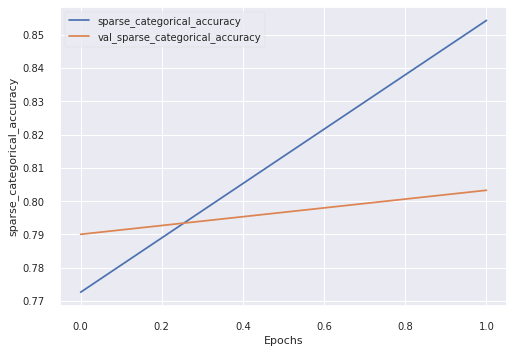

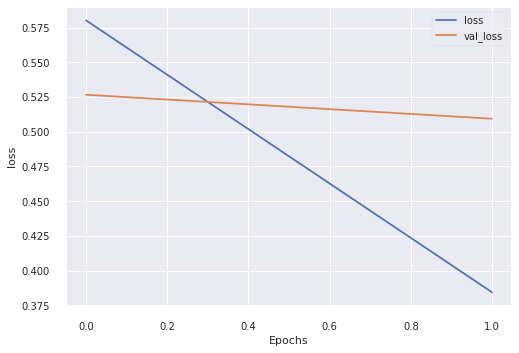

CPU times: user 498 ms, sys: 17.2 ms, total: 515 ms
Wall time: 494 ms


In [221]:
%%time
# per epoch plot of mode performance
  
plot_graphs(history_bert, "sparse_categorical_accuracy")
plot_graphs(history_bert, "loss")

In [222]:
# save to persistent storage
bert_model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/UT-Austin/model_BERT.pkl")

In [223]:
# see performance
history_bert.history


{'loss': [0.5802398920059204, 0.3844180405139923],
 'sparse_categorical_accuracy': [0.7726472020149231, 0.8543338179588318],
 'val_loss': [0.5266832113265991, 0.5094121098518372],
 'val_sparse_categorical_accuracy': [0.790050208568573, 0.8032861948013306]}

## 9.3 Performance of BERT model


In [224]:
# training accuracy
accuracy_train = history_bert.history.get("sparse_categorical_accuracy")[-1]
accuracy_train

0.8543338179588318

In [225]:
# validation accuracy
accuracy_val = history_bert.history.get("val_sparse_categorical_accuracy")[-1]
accuracy_val

0.8032861948013306

In [226]:
print(range(y_test_bert.shape[0]), y_test_bert.shape)

range(0, 2191) (2191,)


In [227]:
%%time 

# re usable funtion to measure various performance KPI

def make_confusion_matrix_BERT(model, 
            test_tf_dataset, y_test_bert,
            history, desc="", CATEGORIES=[]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # y_test_pred_ln = model.predict(X_test)
  # y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)

  # training accuracy
  accuracy_train = history.history.get(
      "sparse_categorical_accuracy")[-1]
  accuracy_train
  print("ACCURACY TRAIN =", accuracy_train) 

  # validation accuracy
  accuracy_val = history.history.get(
      "val_sparse_categorical_accuracy")[-1]
  accuracy_val
  print("ACCURACY VALIDATION =", accuracy_val) 


  y_test_pred = model.predict(
      test_tf_dataset)
  # print("y test predicted =",y_test_pred)
  y_test_pred = np.argmax( y_test_pred.logits, 
                          axis=1 ) 
  # print("y test predicted =",y_test_pred)
  

  # Test accuracy
  # score = model.evaluate(test_tf_dataset)
  accuracy_test = accuracy_score(
                    y_test_bert,
                    y_test_pred
                   )
  print("ACCURACY TEST =", accuracy_test) 

  # Encode classes into numbers
  # y_test_int = y_test.replace({"negative": 1, 
  #               "neutral": 2, 
  #               "positive": 3}).astype("uint8")  

  # Test recall
  recall_test =  recall_score(   
      y_test_bert,
      y_test_pred, 
      average="weighted") 
  print("RECALL TEST =", recall_test) 

  # *********************************************************
  # NOTE : Because Average is chosen as "weighted", 
  # Accuracy-Test == Recall-Test
  # *********************************************************

  # Test precision
  precision_test =  precision_score( 
      y_test_bert,  
      y_test_pred, 
      average="weighted") 
  print("PRECISION TEST =", precision_test) 

  # Test F1-Score
  f1_test = f1_score(     
      y_test_bert,
      y_test_pred, 
      average='weighted')
  print("F1 TEST =", f1_test) 


  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
              # np.argmax(y_test, axis=1), 
              y_test_bert,
              y_test_pred
            )

  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, 
              xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, 
              cmap="YlGnBu", fmt="",
              annot=True)
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  # sns.set_context("notebook")  # talk : bolds the plots

  desc = desc + " Accuracy-Val={:,.4f}".format(accuracy_val)

  return pd.DataFrame( {"Description": desc, 
                        "Accuracy-Train": accuracy_train,
                        # "Accuracy-Validation": accuracy_val,
                        "Accuracy-Test": accuracy_test,
                        "Precision-Train": np.nan,
                        "Precision-Test" : precision_test,
                        "Recall-Train": np.nan,
                        "Recall-Test": recall_test,
                        "F1-Train": np.nan,
                        "F1-Test": f1_test,
                        },
                      index=[0] )



CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


ACCURACY TRAIN = 0.8543338179588318
ACCURACY VALIDATION = 0.8032861948013306
ACCURACY TEST = 0.8128708352350524
RECALL TEST = 0.8128708352350524
PRECISION TEST = 0.8065953351900864
F1 TEST = 0.79679185140322
CPU times: user 18.2 s, sys: 2.41 s, total: 20.6 s
Wall time: 54 s


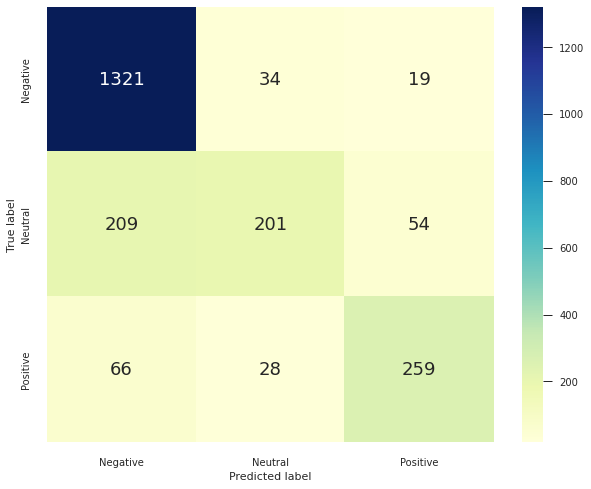

In [228]:
%%time

# test data is unseen

# save the results in a dataframe
df_score_bert = make_confusion_matrix_BERT(
                    model=bert_model, 
                    test_tf_dataset=test_tf_dataset, 
                    y_test_bert=y_test_bert, 
                    history=history_bert,
                    desc="BERT Pre-trained", 
                    CATEGORIES=["Negative", "Neutral", "Positive"]) 

In [229]:
df_score_bert

Description                            Accuracy-Train  Accuracy-Test  \
0  BERT Pre-trained Accuracy-Val=0.8033 0.8543          0.8129           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0 nan              0.8066          nan           0.8129       nan         

   F1-Test  
0 0.7968

In [230]:
df_scores = pd.concat([df_scores, df_score_bert],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test"], ascending=False)

Description                            Accuracy-Train  Accuracy-Test  \
4  BERT Pre-trained Accuracy-Val=0.8033 0.8543          0.8129           
2                 RandomForest Word2Vec 0.9795          0.7703           
3           Bi-LSTM Accuracy-Val=0.7636 0.8315          0.7672           
0                   RandomForest TF-IDF 0.6975          0.6696           
1                      RandomForest BOW 0.6866          0.6645           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
4    nan           0.8066             nan        0.8129          nan      
2 0.9796           0.7583          0.9795        0.7703       0.9794      
3    nan           0.7637             nan        0.7672          nan      
0 0.7901           0.7509          0.6975        0.6696       0.7179      
1 0.7871           0.7546          0.6866        0.6645       0.7073      

   F1-Test  
4 0.7968    
2 0.7562    
3 0.7650    
0 0.6896    
1 0.6857

In [231]:
# To determine feature importance, p-value method can be executed, followed by 
# converting back top features into words. Time was short to try this out. 

# 10. Model Selection

In [232]:
df_scores_sorted = \
                  df_scores.sort_values(
                      by=["Accuracy-Test"],
                      ascending=False,
                      ignore_index=True,
                      inplace=False,
                  )

In [233]:
df_scores_sorted

Description                            Accuracy-Train  Accuracy-Test  \
0  BERT Pre-trained Accuracy-Val=0.8033 0.8543          0.8129           
1                 RandomForest Word2Vec 0.9795          0.7703           
2           Bi-LSTM Accuracy-Val=0.7636 0.8315          0.7672           
3                   RandomForest TF-IDF 0.6975          0.6696           
4                      RandomForest BOW 0.6866          0.6645           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0    nan           0.8066             nan        0.8129          nan      
1 0.9796           0.7583          0.9795        0.7703       0.9794      
2    nan           0.7637             nan        0.7672          nan      
3 0.7901           0.7509          0.6975        0.6696       0.7179      
4 0.7871           0.7546          0.6866        0.6645       0.7073      

   F1-Test  
0 0.7968    
1 0.7562    
2 0.7650    
3 0.6896    
4 0.6857

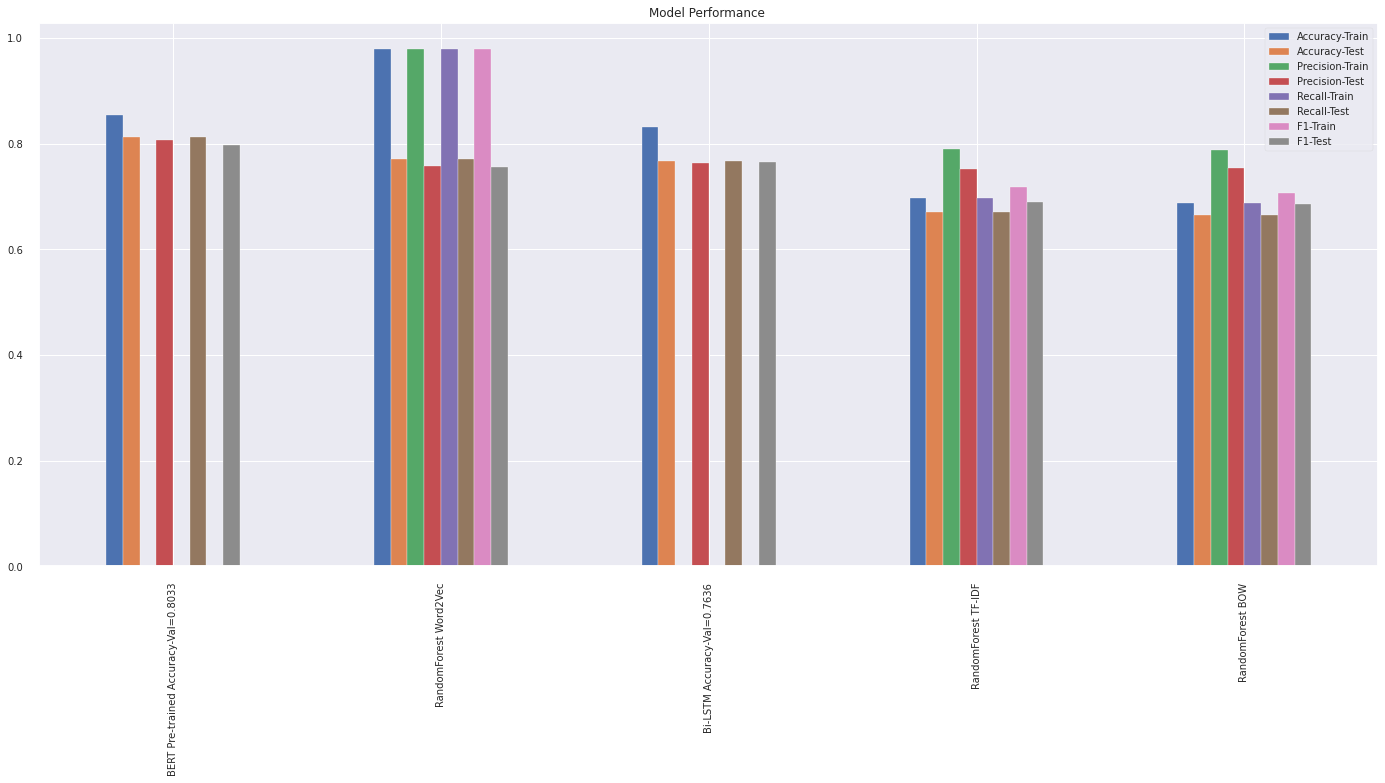

In [234]:
# plot models's performance
fig, axs = plt.subplots(figsize=(24, 10))
df_scores_sorted.plot(kind="bar", ax=axs, legend=True)
plt.title("Model Performance ")
plt.xticks(ticks=df_scores.index, labels=df_scores_sorted["Description"])
fig.show()

In [235]:
# in the plot above the top performing model, first one,
#  is also balanced w.r.t. overfitting
df_scores_sorted.loc[0,"Description"] # the best performed model

'BERT Pre-trained Accuracy-Val=0.8033'

# 11. Key Takeaways - Insights



## 11.1 Initial Observations regrading the problem

1. Twitter text data are casually written text, sometimes lack grammer, coherency, recognized words. Words are often substiuted with emoji, lingo and symbols. Model of Sentiment Analysis would encouter noise in the data, careful text data pre processing would be important. In certain scenarios, human expert would have difficult choices to classify sentiment of tweets.

2. Twitter has limit of words, and users also spend less time in writting tweets. Moreover, only Feb-2015 data are provided.  The volume of data may be indequate for model inference. A pre-trained model of twitter data with many millions of tweets should have better performance.

3. The sentiment expressed by users could be fake, motivated, or machine generated, too. The reliablity of the source of data impacts trustworthiness of model outcome.

4. In the limited scope of this project, the objective would be to only classify positive, negative, and neutral tweets, based on tweet texts. Further, other features (columns) could have considered in this classification, as well as classification of "negative reasons" among the negative tweets could have been explored.


## 11.2 Observation on text Pre-processing and Vectorization

1. The length of tweets are small, after prepoessing the length got shorter. This makes performance of prediction model harder to achieve.

2. The spelling correction was necessary, but the library took long time to run, may require faster hardware resources.

3. The emoji s are less frequent but informative to carry sentiments as we undestand in business sense. The emoji s were converted into words, which were less frequent accross documents (tweets) and contributed to better score in Tf-IDF model.

4. Various models required various vectorization (feature engineering) of cleaned text data. This constrained the time available to explore more algorithms and techniques. Moreover, deep learning models took long execution time.

5. Word2Vec feature engineer provides inetersting word similarity between pair of words given as input, as well as simlar words to a given input word. Please refere to section 7.3 for details. The Word2Vec Feature engineering helped improved model performance from previous basic models, as it takes into account context (sequence) of words.

6. The sequence vectorization with Bi-LSTM model, also takes into account context (sequence) of words, and perform relatively well. 



## 11.3 Prediction model


*   The best model BERT would categorize tweets into sentiment classification of "negative", "neutral", and "positive" with accuracy above 80%. 

*   The accurracy would have been better if the pre-trainiing was performed on tweet text data, instead of general text; because tweet text and the expression of sentiment in tweet are different styles. TwitterBERT was not avaiable as freeware. Time and resource permitted, BERT with GPT2 model of Transformers could have been tried as next step.

*   The model identify "negative", and "positive" tweets with great accuracy. However, the "neutral" tweets are classified with moderate acccuracy, mostly mistaken as "negative". This beheviour of prediction is acceptable from business point of view as further analysis would be carried on "negative" tweets, which are missed minimally.

*   Following words are top 10 most influencial in determining the sentiment class, as per the TF-IDF model : 

    thank, not, great, love, delay, happy, hold, cancel, wait, hours 



## 11.4 Descriptive Analytics based on Exploratory Data Analysis


1. Top 5 users by number of tweets : JetBlueNews, kbosspotter, _mhertz, otisday, throthra.
2. Top 2 most mentioned airlines in tweets data :  United, US Airways        
3. Retweet counts are mosly from 0 to 4; 0 being highest by high margin.
4. Tweets were highest from Eastern Time (US & Canada), which may be proportional to number of customers flying from a time-zone between Feb-16-2015 and Feb-24-2015.
5. Top 5 locations of tweets are : 

      Boston, MA

      New York, NY

      Washington, DC

      New York
            
      USA
6. The neative sentiment tweets are majority.

      negative  ~= 63%

      neutral   ~= 21%

      positive  ~= 16%

7. Top 5 negative reasons of tweet : "Customer Service Issue", "Late Flight","Can't Tell", "Cancelled Flight", "Lost Luggage".

8. The tweets of top negative reasons are re-tweeted more frequently, in general.

9. Negative tweets are re-tweeted far more than other sentiment categories. 

10. Negative tweets are majority in all arilines. Proportion of negative tweets are low in the airlies "Virgin America", high in "US Airways". "Virgin America" had lowest total number of tweets.

11. Negative tweets are from accross majority of the time zones, locations.

12. Retweets are rare for positive tweets.

13. Given the time period of data, Sunday afteroon to Tuesday had majority number of tweets, perhaps proportional to number of customers flying and tweeting near real time. American Airlines had tweets only during this period.


14. Accross all tweets most frequently used words are : "flight", "thank", "plane", "will", "time", "help".  

15. Accross negative tweets most frequently used words are : "flight", "now", "hour", "bag", "customer service", "plane", "time", "help", "Cancelled".

16. Accross neutral tweets most frequently used words are : "flight", "thank", "need", "will", "time", "please", "help", "ticket".

17. Accross positive tweets most frequently used words are : "flight", "thank", "great", "will", "love", "awesome", "time", "got".

  Note : Similar Word Cloud analysis are available per airlines.

18. Among hourly clock, tweets are less frequent during 21:00 to 5:00, perhaps coincide with less flights. The tweets are high between 8:00 to 10:00 and 13:00 to 18:00, perhaps coincide with more flights.

19. On an average a tweet contains 18 words, ranging from 2 to 36. 75 percentile is at 23 words.

20. Mostly negative tweets have more number of words, and positive tweets have less number of words.

21. Top 5 hashtags (#) are : #destinationdragons, #fail, #jetbluw, #unitedairlines, #customerservice.

22. Top 5 mentions (@) are : @united, @usairways, @americanair, @southwestair,  @jetblue.











# 12. Appendix

*Next Steps :*

1. In order to productionize the code, the Notebook needs to saved as *.py file (Python).
2. Also, the code needs to be organized in functions and classes (Object Oriented Programming) for re-use. The code of Data Processing can be combined into generic function to apply in number of use cases, e.g. method of class 'EDA' (Exploratory Data Analysis), also useful during model prediction in production.
3. We need to introduce exception handling in the code, try-catch-finally, and logging.
4. We need to save processed data, results, graphs etc. into persistance store (e.g. disk).

Assumption: Productionization of Code is not in the scope of this assignment, even though I am capable of implementing it.

_____________________________________________________________________________________________________
Thank you for your reading of this Notebook. Please share your suggestions, comments to <sanjib007@gmail.com>

_______________________________________________________________________________________________________________

#  --   The End --